In [1]:
# import numpy as np
import base64
import pandas as pd
# -*- coding: utf-8 -*-
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
from gensim import corpora, models, similarities
import random
from collections import Counter
from __future__ import division
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('popular')
stop_words = stopwords.words('german')
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
print "all imports worked nicely"
import os
import tensorflow as tf
import numpy as np
# import fasttext
from tensorflow.contrib.tensorboard.plugins import projector
from tqdm import tqdm

all imports worked nicely


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [2]:
# Word Vectors
# load the GloVe vectors in a dictionary:

# embeddings_index = {}
# f = open('/home/D072852/glove.840B.300d.txt')
# for line in tqdm(f):
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

embeddings_index_de = {}
f = open('/home/D072852/wiki.de.vec')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_de[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_de))

2275234it [02:32, 14904.05it/s]

Found 2275234 word vectors.


In [3]:
# Or the model could be loaded in this way using Gensim functions:
model_wiki_de = gensim.models.KeyedVectors.load_word2vec_format("wiki.de.vec", binary=False)

In [4]:
# working with embeddings from source https://devmount.github.io/GermanWordEmbeddings/
# get trained model
model = gensim.models.KeyedVectors.load_word2vec_format("german.model", binary=True)
print "model data loaded sucessfully.."
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]
#     vectors = []
#     for word in words:
#         if word in model:
#             vectors.append(model[word])
    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

model data loaded sucessfully..


In [73]:
# len(embeddings_index_de)
i = 4
for key, value in model.vocab.iteritems() :
    if "Indien" in key:
        print key
#     print len(embeddings_index_de[key])
#     print embeddings_index_de[key]
#     i = i-1
#     if i<1:
#         break
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# # words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# # words = ["ftdna","tiergartenviertels","soestdijk","panikartiger"]
# for key in words:
#     if key.lower() in embeddings_index_de:
#         print key, embeddings_index_de[key.lower()]
#     else:
#         print key + " key(s) not present in dictionary"

offizielle_Indienststellung
Indien_Indonesien
Indien_Persien
Persien_Indien
Indienreise
Nordosten_Indiens
Portugiesisch-Indien
Studentin_Indien
Indien
Indien_Burma
Indienststellung_erfolgte
Hyderabad_Indien
Vergewaltigungen_Indien
Mumbai_Indien
Vizekoenig_Indien
Generalgouverneur_Niederlaendisch-Indien
Gruppenvergewaltigung_Indien
Fuerstenstaat_Britisch-Indiens
Seeweg_Indien
Niederlaendisch-Indiens
Unabhaengigkeit_Indiens
Osten_Indiens
Indien_Tibet
Teilung_Indiens
Vergewaltigung_Indien
Teilen_Indiens
ausserhalb_Indiens
Bau_Indienststellung
Indien_Ceylon
Indien_Nepal
Neu-Delhi_Indien
Britisch-Indien_†
Indienststellung
China_Indien
Indien_China
Norden_Indiens
Indien_Suedostasien
Indienststellung_Kapitaenleutnant
Pakistan_Indien
Britisch-Indiens
Indienrat
Indienstnahme
Indien_Sri
Bangalore_Indien
Britisch-Indien
Indienststellung_Oberleutnant
Nordwesten_Indiens
Afrika_Indien
Goa_Indien
Indien_Bangladesch
Kalkutta_Indien
Pune_Indien
Nepal_Indien
Chennai_Indien
Indien_Pakistan
Indiens
Nieder

In [5]:
# get trained model
model02 = gensim.models.KeyedVectors.load_word2vec_format("GER64", binary=False)
# model03 = gensim.models.KeyedVectors.load("de.bin")
# gensim --V

In [6]:
# ------------------EVALUATING different word embeddings ------------------------------------------------------------------
# Checking the vocabulary size for different embeddings
# print len(word_vectors.vocab)
print len(model_wiki_de.vocab)
print len(model02.vocab)
print len(model.vocab)

model_wordList = model.index2word
print type(model_wordList), len(model_wordList)
print model_wordList[:50]
# model.vocab gives you a dictionary sort of embedding_index_de
# print type(word_vectors.vocab)
# fasttext_wordList = word_vectors.index2word
fasttext_wordList = model_wiki_de.index2word
print type(fasttext_wordList), len(fasttext_wordList)
print fasttext_wordList[:50]

ger64_wordList = model02.index2word
print type(ger64_wordList), len(ger64_wordList)
print ger64_wordList[:50]

# googleNeg_wordList = model03.index2word
# print type(googleNeg_wordList), len(googleNeg_wordList)
# print googleNeg_wordList[:50]


# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# draw_words(model, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

# words = ["Schweiz","Franken","Deutschland","Euro","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna","Indien", "Rupee"]
# draw_words(model02, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

# model.doesnt_match("wurst senf brezn apfel".split())
# model02.doesnt_match("wurst senf brezn apfel".split())

# words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# draw_words(model, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
# draw_words(model02, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')


2275233
2001952
608130
<type 'list'> 608130
[u'Die', u'fuer', u'wurde', u'Der', u'dass', u'Das', u'ueber', u'In', u'Im', u'wurden', u'Er', u'Sie', u'Jahr', u'mehr', u'zwei', u'Es', u'Nach', u'sowie', u'ab', u'Jahren', u'Jahre', u'sei', u'Am', u'beim', u'drei', u'seit', u'koennen', u'schon', u'Euro', u'Stadt', u'Mit', u'ersten', u'Ein', u'Auch', u'gibt', u'etwa', u'bereits', u'jedoch', u'Zeit', u'immer', u'Uhr', u'Als', u'Bei', u'1', u'Ende', u'heute', u'Fuer', u'sagte', u'Von', u'konnte']
<type 'list'> 2275233
[u'.', u',', u'</s>', u'-', u'der', u')', u'die', u'(', u'und', u'in', u'von', u"'", u'den', u'im', u'das', u'des', u'mit', u'ist', u'er', u'zu', u'f\xfcr', u'auf', u'ein', u'als', u'dem', u'eine', u'wurde', u'\u2013', u'auch', u'sich', u'nicht', u'an', u'es', u'nach', u'war', u'bei', u'aus', u'rd', u'am', u'sie', u'cest', u'bis', u'"', u'ich', u'einer', u'zum', u'werden', u'sind', u'oder', u'wird']
<type 'list'> 2001952
[u'</s>', u'.', u',', u'der', u'die', u'und', u'in', u"''",

In [5]:
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
# embedding = np.empty((len(word2vec.words), word2vec.dim), dtype=np.float32)
# for i, word in enumerate(word2vec.words):
#     embedding[i] = word2vec[word]

# embedding = np.empty((len(embeddings_index), 300), dtype=np.float32)
# i = 0
# for key, value in embeddings_index.iteritems() :
#     embedding[i] = value
#     i = i+1

embedding_de = np.empty((len(embeddings_index_de), 300), dtype=np.float32)
i = 0
for key, value in embeddings_index_de.iteritems() :
    embedding_de[i] = value
    i = i+1

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding_de')
place = tf.placeholder(tf.float32, shape=embedding_de.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding_de})

# write labels
with open('/home/D072852/log/metadata_de.tsv', 'w') as f:
    for key in embeddings_index_de.iteritems() :
        f.write(key[0] + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding_de:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de.ckpt"))

'/home/D072852/log/model_de.ckpt'

In [17]:
# Setting up word embeddings to be visualized in Tensor Board - 
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
embedding = np.empty((len(model02.vocab), 64), dtype=np.float32)
for i, word in enumerate(model02.vocab):
    embedding[i] = model02[word]

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding')
place = tf.placeholder(tf.float32, shape=embedding.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding})

# write labels, creating a meta file -
with open('/home/D072852/log/metadata_de_model02.tsv', 'w') as f:
    for key in model02.vocab.iteritems() :
        f.write(key[0].encode('utf-8') + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de_model02.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de_model02.ckpt"))

'/home/D072852/log/model_de_model02.ckpt'

In [8]:
# Function to visualize 2D vectors using PCS/Tsne
# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words_fasttext(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word.lower()] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

In [9]:
# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","pund/pfund","Japan","Yen","Russland","Rubel","USA","usdollar","Kroatien","Kuna","Indien", "Rupee"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# words = ["Deutschland","Deutsch","USA","Englisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]

# draw_words(embeddings_index_de, words, True, True, True, -3, 3, -2, 6, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
draw_words_fasttext(embeddings_index_de, words, True, True, False, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ Hauptstadt$')
draw_words(model, words, True, True, False, -3, 2.5, -2, 3, r'$PCA\ Visualisierung:\ Haus$')
draw_words(model02, words, True, True, False, -3, 2.5, -2, 3, r'$PCA\ Visualisierung:\ Haus$')


NameError: name 'embeddings_index_de' is not defined

In [7]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.vec', binary=False)  # C text format
# word_vectors01 = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.bin', binary=True)  # C binary format
# word_vectors.save('/home/D072852/word_vectors_fbDE')
# word_vectors01 = KeyedVectors('/home/D072852/word_vectors_fbDE')
# print word_vectors01
# word_vectors01.cosine_similarities('frau','mann')

[(u'kindern', 0.796553373336792), (u'enkelkinder', 0.7761600017547607), (u'#kinder', 0.7728991508483887), (u'\xbbkinder', 0.7651199102401733), (u'kleinkinder', 0.7651147842407227), (u'enkelkindern', 0.7576228976249695), (u'kindeskinder', 0.7451964616775513), (u'urenkelkinder', 0.7424343824386597), (u'einzelkinder', 0.7415428757667542), (u'kinder/jugendliche', 0.7330327033996582)]


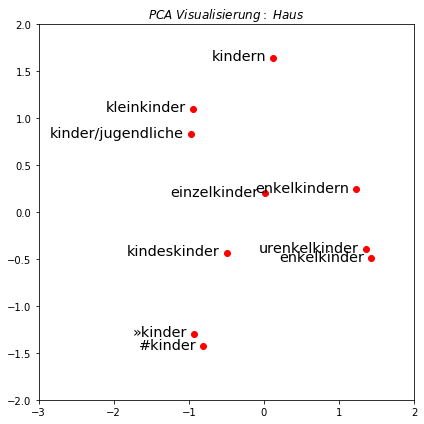

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'koenige', 0.9254183769226074),
 (u'koenigin', 0.9117095470428467),
 (u'koenigi', 0.8989173173904419),
 (u'bkoenig', 0.8936635851860046),
 (u'erlkoenig', 0.8904488682746887),
 (u'koenigs', 0.8678578734397888),
 (u'koeniger', 0.8672288060188293),
 (u'koenigl', 0.8639868497848511),
 (u'koenigsfeld', 0.8413063883781433),
 (u'heussner', 0.8398495316505432)]

In [8]:
# word_vectors.wv.similarity('frau', 'man')
matches = word_vectors.most_similar(positive=["kinder"], negative=[], topn=10)
print matches
words = [match[0] for match in matches]
draw_words_fasttext(word_vectors, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')
word_vectors.wv.most_similar_cosmul(positive=['frau', 'koenig'], negative=['mann'])

In [10]:
# Kerze + Feuerzeug = brennende_Kerze
# plot related words to 'house'
matches = model.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
# draw_words(model, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')

print model.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
print model.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
print model.wv.most_similar_cosmul(positive=['Kerze', 'Feuerzeug'])

matches = model02.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
# draw_words(model02, words, True, False, False, -3, 2, -2, 3, r'$PCA\ Visualisierung:\ Haus$')
# model02.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
model02.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
# model02.wv.most_similar_cosmul(positive=['Kerze', 'Feuerzeug'])


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'Koenigin', 0.9604154229164124), (u'Prinzessin', 0.9353479743003845), (u'Jungschuetzenkoenigin', 0.9134643077850342), (u'Prinz', 0.9023544788360596), (u'Regentin', 0.8993106484413147), (u'Schuetzenkoenigin', 0.8981477618217468), (u'Erntekoenigin', 0.8974711298942566), (u'Majestaet', 0.8957144618034363), (u'Carl_XVI', 0.8947469592094421), (u'Kaiserin', 0.8943732380867004)]
[(u'Putin', 0.9586252570152283), (u'US-Praesident_Obama', 0.9078115224838257), (u'Russlands_Staatschef', 0.9003345966339111), (u'Wladimir_Putin', 0.8979546427726746), (u'russischen_Praesidenten', 0.8963831067085266), (u'Barack_Obama', 0.8915544152259827), (u'Kremlchef_Wladimir', 0.8879683613777161), (u'Russlands_Praesident', 0.8851548433303833), (u'US-Aussenminister_Kerry', 0.881401538848877), (u'US-Praesident_Barack', 0.8757231831550598)]
[(u'brennende_Kerze', 0.7145117521286011), (u'Herdplatte', 0.710566520690918), (u'brennende_Zigarette', 0.6972489356994629), (u'Teelicht', 0.6950814127922058), (u'Grablicht', 0.6

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'Putin', 1.0135201215744019),
 (u'Poroschenko', 1.0086878538131714),
 (u'Jazenjuk', 0.9955540895462036),
 (u'Biden', 0.9941121339797974),
 (u'Janukowitsch', 0.991157591342926),
 (u'Medwedjew', 0.9903574585914612),
 (u'Medwedew', 0.9889390468597412),
 (u'Karsai', 0.9872202277183533),
 (u'Assad', 0.9869940280914307),
 (u'Kerry', 0.9860815405845642)]

('Number of rows, columns in train dataset : ', (20000, 10))
Index([u'MATNR', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING', u'RATINGTITEL',
       u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY', u'THEME'],
      dtype='object')
MATNR             object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object
Before removing the duplicates
count                                                 20000
unique                                                  247
top       <p>Erstens kommt es anders &amp;#8230;</p><p>V...
freq                                                   1248
Name: ADDITIONALTEXT, dtype: object
AFTER removing the duplicates
count                                                   247
unique                                                  247
top       Fast zu schön zum Vernaschen: klein

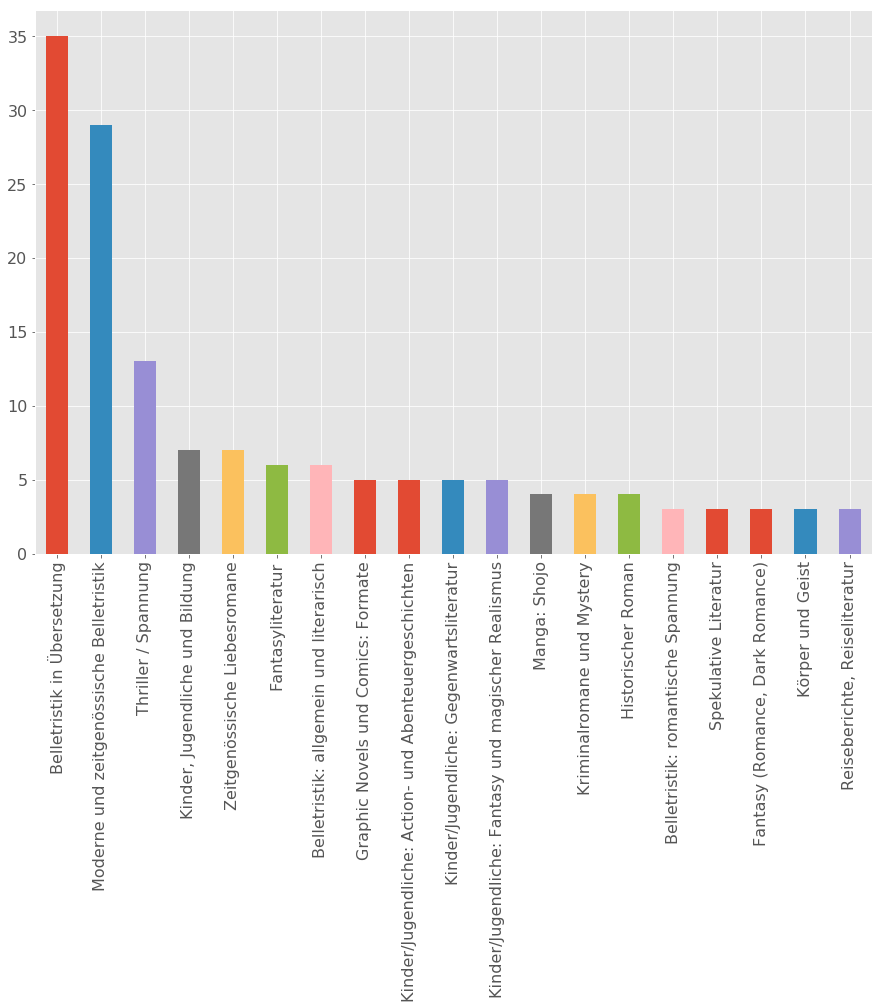

In [11]:
# function taking data frame as input preprocess and return another data frame
def dataPreprocess(train) :
    train = train.iloc[:, :-1]
    train.drop(train.columns[0], axis=1, inplace=True)
    print("Number of rows, columns in train dataset : ",train.shape)
    print train.columns
    print train.dtypes
    train.head(2)
    print "Before removing the duplicates\n", train['ADDITIONALTEXT'].describe()
    # dropping the rows with duplicate values in Additional text field -
    train.drop_duplicates(subset='ADDITIONALTEXT', keep="first", inplace=True)
    print "AFTER removing the duplicates\n", train['ADDITIONALTEXT'].describe()
    train.head(2)
    return train

def dataVisualise(train) :
    # trying some plotting of data wrt THEMES
    import matplotlib as mpl
    # Just making the plots look better
    mpl.style.use('ggplot')
    mpl.rcParams['figure.figsize'] = (8,6)
    mpl.rcParams['font.size'] = 16
    print "CHECKING for themes now\n", train['THEME'].describe()
    # trying to filter out the long tail and keep only themes with count more than 3
    counts = train['THEME'].value_counts()
    counts1 =  counts[counts >= 2]
    print "DISTRIBUTION of THEMES:"
    print counts1
    plot_data_theme = train[train['THEME'].isin(counts[counts >= 3].index)]
    plot_data_theme['THEME'].value_counts().plot.bar(y='THEME', figsize=(15,10))

    print "CHECKING for keywords now\n", train['SCHLAGWORT'].describe()
    counts = train['SCHLAGWORT'].value_counts()
    counts2 = counts[counts >= 2]
    print "DISTRIBUTION of Schlagworts:"
    print counts2
#     plot_data_schlagwort = train[train['SCHLAGWORT'].isin(counts[counts >= 4].index)]
#     plot_data_schlagwort['SCHLAGWORT'].value_counts().plot.bar(figsize=(25,10))

    # We can see there are only two categories - Subject and Main Subject.
    print "CHECKING for categories now\n", train['CATEGORY'].describe()

train2 = pd.read_csv("/home/D072852/Thalia_data/thalia.csv", sep='|', skiprows = range(1, 10000), nrows=20000)
train2 = dataPreprocess(train2)

dataVisualise(train2)


('Number of rows, columns in train dataset : ', (30000, 10))
Index([u'MATNR', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING', u'RATINGTITEL',
       u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY', u'THEME'],
      dtype='object')
MATNR             object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object
Before removing the duplicates
count                                                 30000
unique                                                  611
top       <p>Erstens kommt es anders &amp;#8230;</p><p>V...
freq                                                   1248
Name: ADDITIONALTEXT, dtype: object
AFTER removing the duplicates
count                                                   611
unique                                                  611
top       <p>Dies ist die Geschichte einer ma

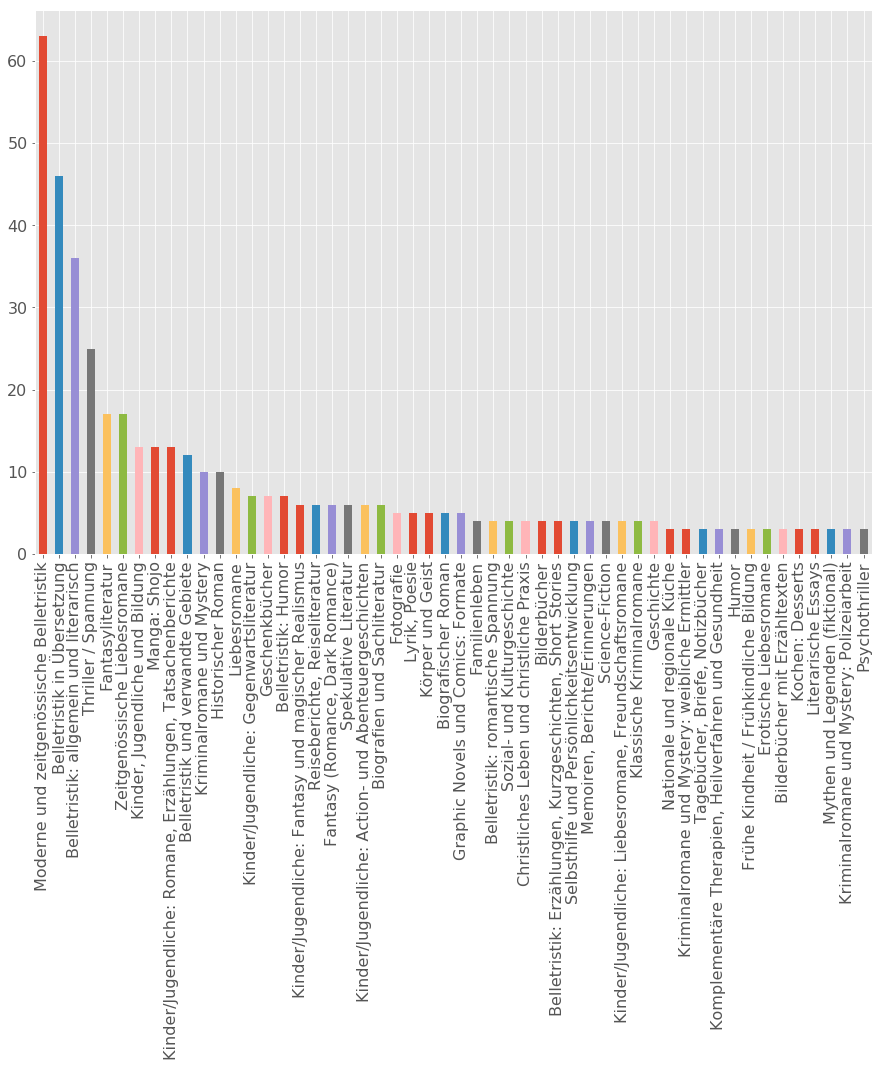

In [22]:
# data input and processing
train = pd.read_csv("/home/D072852/Thalia_data/thalia.csv", sep='|', nrows=30000)
train = train.iloc[:, :-1]
train.drop(train.columns[0], axis=1, inplace=True)
print("Number of rows, columns in train dataset : ",train.shape)
print train.columns
# print train.head
print train.dtypes
train.head(2)

print "Before removing the duplicates\n", train['ADDITIONALTEXT'].describe()
# dropping the rows with duplicate values in Additional text field -
train.drop_duplicates(subset='ADDITIONALTEXT', keep="first", inplace=True)
print "AFTER removing the duplicates\n", train['ADDITIONALTEXT'].describe()
# train['THEME'].describe()
# print train['ADDITIONALTEXT'].nunique()
# train['ADDITIONALTEXT']
train.head(10)

train_text = train['ADDITIONALTEXT'].tolist()
train_id = train['MATNR'].tolist()
train_theme = train['THEME'].tolist()
train_schalgwort = train['SCHLAGWORT'].tolist()
# for s in train_theme:
#     s = s.decode('utf-8')
print len(train_id)
print type(train_id)
print train_id[:5]
print len(train_text)
print type(train_text)
print train_text[:5]
# handling the unicode encoding in the data set
for s in train_theme[:5]:
    print s.decode('utf-8')
total_len = 0
# calculating the average text lenght in training corpus
for s in train_text:
    total_len = total_len + len(s.split())
average_text_len = total_len/len(train_text)

print "Average length of the documents in training corpus is", average_text_len

# trying some plotting of data wrt THEMES
dataVisualise(train)

In [23]:
# Actual data preprocessing starts from here - 

from gensim import corpora, models, similarities 
# list of Deutsche stop words
# print stop_words
# print len(stop_words)

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")

# Lemmatizer does NOT work for Deutsche language 
# from nltk.stem import WordNetLemmatizer
# wnl = WordNetLemmatizer()

# generating list of stop_words with title case to be removed from text as well
stop_words_caps = [word.title() for word in stop_words]
stop_words.extend(stop_words_caps)
# extra missing (variations of) stop words that pop up in data
extra_stop_words = ["dass","amp", "Und", "her", "Her"]
stop_words.extend(extra_stop_words)
# print stop_words, len(stop_words)
# print stop_words_caps, len(stop_words_caps)

# Here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) 
#     and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    return filtered_tokens

#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag
def strip_proppers_POS(text):
    tagged = pos_tag(text) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

print "BEFORE preprocess text looks like - "
print train_text[2]
#tokenize
# %time tokenized_text = [tokenize_only(text.decode('utf-8')) for text in train_text]
%time tokenized_text = [tokenize_only(text.decode('utf-8')) for text in train_text]

print "done with tokenisation","After tokenisation text is -"
# print tokenized_text[0]
for word in tokenized_text[2]:
    print word,    
    
#remove stop words
%time texts = [[word for word in text if word not in stop_words] for text in tokenized_text]
print "done with stop word removal","After stop word removal text is -"
for word in texts[2]:
    print word,
#remove proper names -  doesnt work very well, removes all the words with first letter capital
# %time preprocess = [strip_proppers_POS(doc) for doc in texts]
# print "done with Proper Noun removal", "After Proper noun removal text is - "
# # print preprocess[0]
# for word in preprocess[0]:
#     print word,

#create a Gensim dictionary from the texts
%time dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
%time dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
%time corpus = [dictionary.doc2bow(text) for text in texts]

# Initialising LDA model 
%time lda = models.LdaModel(corpus, num_topics=30, id2word=dictionary, update_every=5,chunksize=10000, passes=100)

BEFORE preprocess text looks like - 
<p>Hana verliebt sich in einen mysteriösen jungen Mann, doch dieser hat ein Geheimnis: Er stammt vom Geschlecht der japanischen Wölfen ab, die schon seit über hundert Jahren ausgestorbenen sind und ist daher halb Mensch und halb Wolf. Hana wird schwanger und bekommt bald darauf ihr erstes Kind, Yuki. Als im Jahr darauf Ame geboren wird, stirbt der Vater, als er in Wolfsgestalt durch die Stadt läuft. Von nun an wachsen die beiden Kinder bei ihrer jungen Mutter auf. Doch schon bald kommt es zu Schwierigkeiten, da sich die Kinder immer wieder in Wölfchen verwandeln. Und Hana muss sich überlegen, wie sie ihre kleine Familie beschützen kann.</p>
CPU times: user 1.08 s, sys: 12.1 ms, total: 1.09 s
Wall time: 1.09 s
done with tokenisation After tokenisation text is -
Hana verliebt sich einen mysteriösen jungen Mann doch dieser hat ein Geheimnis stammt vom Geschlecht der japanischen Wölfen die schon seit über hundert Jahren ausgestorbenen sind und ist daher

2018-05-16 15:23:02,684 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-16 15:23:02,756 : INFO : built Dictionary(15185 unique tokens: [u'Jojo', u'M\xe4chte', u'Andreas', u'Vereinsvorstand', u'abenteuerliche']...) from 611 documents (total 34033 corpus positions)
2018-05-16 15:23:02,772 : INFO : discarding 0 tokens: []...
2018-05-16 15:23:02,773 : INFO : keeping 15185 tokens which were in no less than 1 and no more than 488 (=80.0%) documents
2018-05-16 15:23:02,797 : INFO : resulting dictionary: Dictionary(15185 unique tokens: [u'Jojo', u'M\xe4chte', u'Andreas', u'Vereinsvorstand', u'abenteuerliche']...)
2018-05-16 15:23:02,848 : INFO : using symmetric alpha at 0.0333333333333
2018-05-16 15:23:02,850 : INFO : using symmetric eta at 0.0333333333333
2018-05-16 15:23:02,854 : INFO : using serial LDA version on this node


After stop word removal text is -
Hana verliebt mysteriösen jungen Mann Geheimnis stammt Geschlecht japanischen Wölfen schon seit hundert Jahren ausgestorbenen daher halb Mensch halb Wolf Hana schwanger bekommt bald darauf erstes Kind Yuki Jahr darauf Ame geboren stirbt Vater Wolfsgestalt Stadt läuft wachsen beiden Kinder jungen Mutter schon bald kommt Schwierigkeiten Kinder immer Wölfchen verwandeln Hana überlegen kleine Familie beschützen kann.CPU times: user 92.7 ms, sys: 4.76 ms, total: 97.5 ms
Wall time: 73.3 ms
CPU times: user 27.1 ms, sys: 23.8 ms, total: 50.9 ms
Wall time: 39.4 ms
CPU times: user 43.7 ms, sys: 16.4 ms, total: 60.1 ms
Wall time: 47 ms


2018-05-16 15:23:02,925 : INFO : running online (multi-pass) LDA training, 30 topics, 100 passes over the supplied corpus of 611 documents, updating model once every 611 documents, evaluating perplexity every 611 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-16 15:23:03,608 : INFO : -37.007 per-word bound, 138084240327.2 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:03,610 : INFO : PROGRESS: pass 0, at document #611/611
2018-05-16 15:23:04,165 : INFO : topic #13 (0.033): 0.005*"Leben" + 0.003*"mehr" + 0.003*"gibt" + 0.003*"Sarah" + 0.003*"immer" + 0.002*"Geschichte" + 0.002*"macht" + 0.002*"findet" + 0.002*"lässt" + 0.002*"Glück"
2018-05-16 15:23:04,166 : INFO : topic #14 (0.033): 0.005*"Buch" + 0.005*"Kinder" + 0.004*"Islam" + 0.003*"Welt" + 0.003*"finden" + 0.003*"kleinen" + 0.003*"Liebe" + 0.002*"Leben" + 0.002*"beschreibt" + 0.002*"schon"
2018-05-16 15:23:04,168 : INFO : topic #2 (0.033): 0.008*"Liebe" 

2018-05-16 15:23:06,811 : INFO : topic diff=0.236381, rho=0.377964
2018-05-16 15:23:07,116 : INFO : -9.841 per-word bound, 917.0 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:07,117 : INFO : PROGRESS: pass 6, at document #611/611
2018-05-16 15:23:07,305 : INFO : topic #12 (0.033): 0.006*"mehr" + 0.005*"Liebe" + 0.004*"nie" + 0.003*"immer" + 0.003*"Frau" + 0.003*"Buch" + 0.003*"Leben" + 0.003*"bereits" + 0.003*"Kinder" + 0.003*"Geschichte"
2018-05-16 15:23:07,307 : INFO : topic #5 (0.033): 0.005*"Buch" + 0.005*"Leben" + 0.004*"Liebe" + 0.004*"immer" + 0.004*"mehr" + 0.003*"Seiten" + 0.003*"Frau" + 0.003*"Mann" + 0.003*"Pamela" + 0.002*"zwei"
2018-05-16 15:23:07,309 : INFO : topic #25 (0.033): 0.007*"Welt" + 0.006*"Morven" + 0.004*"Kendrick" + 0.004*"Schicksal" + 0.004*"Ordnung" + 0.004*"Chaos" + 0.003*"stellt" + 0.003*"immer" + 0.003*"Chara" + 0.003*"Thorn"
2018-05-16 15:23:07,311 : INFO : topic #23 (0.033): 0.005*"Leben" + 0.004*"beid

2018-05-16 15:23:10,073 : INFO : -9.781 per-word bound, 879.5 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:10,074 : INFO : PROGRESS: pass 12, at document #611/611
2018-05-16 15:23:10,246 : INFO : topic #23 (0.033): 0.005*"Leben" + 0.004*"beiden" + 0.004*"Geschichte" + 0.004*"Frau" + 0.004*"Vater" + 0.003*"Zeit" + 0.003*"neuen" + 0.003*"junge" + 0.003*"Innes" + 0.003*"Familie"
2018-05-16 15:23:10,247 : INFO : topic #0 (0.033): 0.005*"Leben" + 0.003*"Reise" + 0.003*"Teil" + 0.003*"Geschichte" + 0.003*"Wald" + 0.003*"kommt" + 0.002*"steht" + 0.002*"beiden" + 0.002*"Leser" + 0.002*"tun"
2018-05-16 15:23:10,249 : INFO : topic #25 (0.033): 0.007*"Welt" + 0.006*"Morven" + 0.004*"Kendrick" + 0.004*"Schicksal" + 0.004*"Ordnung" + 0.004*"Chaos" + 0.003*"stellt" + 0.003*"immer" + 0.003*"Chara" + 0.003*"Thorn"
2018-05-16 15:23:10,250 : INFO : topic #3 (0.033): 0.008*"Leben" + 0.005*"Buch" + 0.004*"führt" + 0.004*"Menschen" + 0.003*"geht" + 0.003

2018-05-16 15:23:12,992 : INFO : PROGRESS: pass 18, at document #611/611
2018-05-16 15:23:13,159 : INFO : topic #5 (0.033): 0.005*"Leben" + 0.005*"Buch" + 0.004*"Liebe" + 0.004*"immer" + 0.004*"mehr" + 0.003*"Seiten" + 0.003*"Frau" + 0.003*"Mann" + 0.003*"Pamela" + 0.002*"gibt"
2018-05-16 15:23:13,161 : INFO : topic #22 (0.033): 0.008*"Leben" + 0.005*"Liebe" + 0.003*"mehr" + 0.003*"Geschichten" + 0.003*"Zeit" + 0.003*"Stadt" + 0.003*"neue" + 0.003*"Jahre" + 0.003*"Eltern" + 0.003*"Emil"
2018-05-16 15:23:13,162 : INFO : topic #8 (0.033): 0.004*"quot" + 0.003*"Leser" + 0.003*"mehr" + 0.003*"gut" + 0.003*"Buch" + 0.002*"damals" + 0.002*"Jahre" + 0.002*"weiß" + 0.002*"bietet" + 0.002*"steht"
2018-05-16 15:23:13,164 : INFO : topic #12 (0.033): 0.006*"mehr" + 0.005*"Liebe" + 0.004*"nie" + 0.003*"immer" + 0.003*"Frau" + 0.003*"Buch" + 0.003*"Leben" + 0.003*"bereits" + 0.003*"Kinder" + 0.003*"Geschichte"
2018-05-16 15:23:13,165 : INFO : topic #10 (0.033): 0.006*"Buch" + 0.006*"/li" + 0.005*"Ga

2018-05-16 15:23:16,122 : INFO : topic #27 (0.033): 0.010*"Buch" + 0.005*"große" + 0.004*"Leben" + 0.004*"Geschichte" + 0.004*"Star" + 0.004*"Wars" + 0.003*"Liebe" + 0.003*"Sticker" + 0.003*"entsteht" + 0.003*"erzählt"
2018-05-16 15:23:16,124 : INFO : topic #6 (0.033): 0.005*"Lilly" + 0.004*"mehr" + 0.004*"Anwältin" + 0.004*"Anna" + 0.004*"ganz" + 0.003*"Liebe" + 0.003*"Buch" + 0.003*"Mädchen" + 0.003*"Wald" + 0.003*"Katie"
2018-05-16 15:23:16,126 : INFO : topic #22 (0.033): 0.008*"Leben" + 0.005*"Liebe" + 0.003*"mehr" + 0.003*"Geschichten" + 0.003*"Zeit" + 0.003*"Stadt" + 0.003*"neue" + 0.003*"Jahre" + 0.003*"Eltern" + 0.003*"Emil"
2018-05-16 15:23:16,127 : INFO : topic #3 (0.033): 0.007*"Leben" + 0.005*"Buch" + 0.004*"führt" + 0.004*"Menschen" + 0.003*"geht" + 0.003*"erzählt" + 0.003*"Kommissar" + 0.003*"Band" + 0.003*"dabei" + 0.002*"Zeit"
2018-05-16 15:23:16,129 : INFO : topic #1 (0.033): 0.006*"Leben" + 0.004*"Buch" + 0.004*"macht" + 0.003*"Unternehmen" + 0.003*"Geschichten" + 0.0

2018-05-16 15:23:19,043 : INFO : topic #27 (0.033): 0.010*"Buch" + 0.005*"große" + 0.004*"Leben" + 0.004*"Geschichte" + 0.004*"Star" + 0.004*"Wars" + 0.003*"Liebe" + 0.003*"Sticker" + 0.003*"entsteht" + 0.003*"erzählt"
2018-05-16 15:23:19,044 : INFO : topic #15 (0.033): 0.004*"Leben" + 0.003*"Frau" + 0.003*"Roman" + 0.003*"Gesellschaft" + 0.003*"Zeit" + 0.003*"Mutter" + 0.003*"Neuanfang" + 0.003*"Welt" + 0.003*"Suche" + 0.003*"Liebe"
2018-05-16 15:23:19,046 : INFO : topic #9 (0.033): 0.005*"Achtsamkeit" + 0.004*"Leben" + 0.004*"Buch" + 0.003*"Familie" + 0.003*"Tag" + 0.003*"mehr" + 0.003*"Marie" + 0.003*"zeigt" + 0.003*"Mutter" + 0.003*"Zeit"
2018-05-16 15:23:19,047 : INFO : topic #6 (0.033): 0.005*"Lilly" + 0.004*"mehr" + 0.004*"Anwältin" + 0.004*"Anna" + 0.004*"ganz" + 0.003*"Liebe" + 0.003*"Buch" + 0.003*"Mädchen" + 0.003*"Wald" + 0.003*"Katie"
2018-05-16 15:23:19,049 : INFO : topic diff=0.000295, rho=0.176777
2018-05-16 15:23:19,362 : INFO : -9.777 per-word bound, 877.3 perplexity 

2018-05-16 15:23:21,989 : INFO : topic #27 (0.033): 0.010*"Buch" + 0.005*"große" + 0.004*"Leben" + 0.004*"Geschichte" + 0.004*"Star" + 0.004*"Wars" + 0.003*"Liebe" + 0.003*"Sticker" + 0.003*"erzählt" + 0.003*"entsteht"
2018-05-16 15:23:21,991 : INFO : topic #26 (0.033): 0.007*"Liebe" + 0.005*"Mann" + 0.004*"Familie" + 0.003*"immer" + 0.003*"jungen" + 0.003*"schon" + 0.003*"Jahren" + 0.002*"Suche" + 0.002*"Lea" + 0.002*"Nekael"
2018-05-16 15:23:21,992 : INFO : topic #23 (0.033): 0.005*"Leben" + 0.004*"beiden" + 0.004*"Geschichte" + 0.004*"Frau" + 0.004*"Vater" + 0.003*"Zeit" + 0.003*"neuen" + 0.003*"junge" + 0.003*"Innes" + 0.003*"Familie"
2018-05-16 15:23:21,994 : INFO : topic diff=0.000106, rho=0.162221
2018-05-16 15:23:22,307 : INFO : -9.777 per-word bound, 877.2 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:22,308 : INFO : PROGRESS: pass 37, at document #611/611
2018-05-16 15:23:22,483 : INFO : topic #20 (0.033): 0.004*"Leben" + 0.

2018-05-16 15:23:24,971 : INFO : topic #24 (0.033): 0.006*"Liebe" + 0.004*"Leben" + 0.004*"Mandy" + 0.003*"Buch" + 0.003*"Geschichten" + 0.003*"Menschen" + 0.003*"geht" + 0.003*"Matéo" + 0.003*"Venedig" + 0.002*"jedoch"
2018-05-16 15:23:24,972 : INFO : topic #25 (0.033): 0.007*"Welt" + 0.006*"Morven" + 0.004*"Kendrick" + 0.004*"Schicksal" + 0.004*"Chaos" + 0.004*"Ordnung" + 0.003*"stellt" + 0.003*"immer" + 0.003*"Chara" + 0.003*"Thorn"
2018-05-16 15:23:24,974 : INFO : topic diff=0.000049, rho=0.150756
2018-05-16 15:23:25,294 : INFO : -9.777 per-word bound, 877.2 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:25,295 : INFO : PROGRESS: pass 43, at document #611/611
2018-05-16 15:23:25,466 : INFO : topic #8 (0.033): 0.004*"quot" + 0.003*"Leser" + 0.003*"mehr" + 0.003*"gut" + 0.003*"Buch" + 0.002*"damals" + 0.002*"Jahre" + 0.002*"weiß" + 0.002*"bietet" + 0.002*"steht"
2018-05-16 15:23:25,467 : INFO : topic #12 (0.033): 0.007*"mehr" + 0.005

2018-05-16 15:23:27,920 : INFO : topic #8 (0.033): 0.004*"quot" + 0.003*"Leser" + 0.003*"mehr" + 0.003*"gut" + 0.003*"Buch" + 0.002*"damals" + 0.002*"Jahre" + 0.002*"weiß" + 0.002*"bietet" + 0.002*"steht"
2018-05-16 15:23:27,922 : INFO : topic diff=0.000033, rho=0.141421
2018-05-16 15:23:28,229 : INFO : -9.777 per-word bound, 877.2 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:28,230 : INFO : PROGRESS: pass 49, at document #611/611
2018-05-16 15:23:28,403 : INFO : topic #24 (0.033): 0.006*"Liebe" + 0.004*"Leben" + 0.004*"Mandy" + 0.003*"Buch" + 0.003*"Geschichten" + 0.003*"geht" + 0.003*"Menschen" + 0.003*"Matéo" + 0.003*"Venedig" + 0.002*"jedoch"
2018-05-16 15:23:28,404 : INFO : topic #25 (0.033): 0.007*"Welt" + 0.006*"Morven" + 0.004*"Kendrick" + 0.004*"Schicksal" + 0.004*"Ordnung" + 0.004*"Chaos" + 0.003*"stellt" + 0.003*"immer" + 0.003*"Thorn" + 0.003*"Telos"
2018-05-16 15:23:28,406 : INFO : topic #23 (0.033): 0.005*"Leben" + 0.00

2018-05-16 15:23:30,832 : INFO : topic diff=0.000015, rho=0.133631
2018-05-16 15:23:31,140 : INFO : -9.777 per-word bound, 877.1 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:31,142 : INFO : PROGRESS: pass 55, at document #611/611
2018-05-16 15:23:31,309 : INFO : topic #2 (0.033): 0.007*"Liebe" + 0.004*"immer" + 0.004*"Lucinda" + 0.004*"Welt" + 0.004*"Frau" + 0.003*"Geschichte" + 0.003*"Sehnsucht" + 0.003*"Mutter" + 0.003*"seit" + 0.003*"Kölner"
2018-05-16 15:23:31,311 : INFO : topic #26 (0.033): 0.007*"Liebe" + 0.005*"Mann" + 0.004*"Familie" + 0.003*"immer" + 0.003*"jungen" + 0.003*"schon" + 0.003*"Jahren" + 0.002*"Suche" + 0.002*"Lea" + 0.002*"Nekael"
2018-05-16 15:23:31,312 : INFO : topic #6 (0.033): 0.005*"Lilly" + 0.004*"mehr" + 0.004*"Anwältin" + 0.004*"Anna" + 0.004*"ganz" + 0.003*"Buch" + 0.003*"Liebe" + 0.003*"Mädchen" + 0.003*"Wald" + 0.003*"Katie"
2018-05-16 15:23:31,314 : INFO : topic #23 (0.033): 0.005*"Leben" + 0.004*"be

2018-05-16 15:23:34,043 : INFO : -9.777 per-word bound, 877.1 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:34,045 : INFO : PROGRESS: pass 61, at document #611/611
2018-05-16 15:23:34,211 : INFO : topic #14 (0.033): 0.005*"Islam" + 0.005*"Kinder" + 0.005*"Buch" + 0.004*"Welt" + 0.004*"kleinen" + 0.004*"finden" + 0.003*"Kobolde" + 0.003*"Leben" + 0.003*"beschreibt" + 0.003*"Liebe"
2018-05-16 15:23:34,212 : INFO : topic #28 (0.033): 0.006*"Leben" + 0.004*"Zeit" + 0.003*"gibt" + 0.003*"Anleitungen" + 0.003*"Alice" + 0.003*"Jahre" + 0.003*"Neal" + 0.003*"ersten" + 0.002*"Buch" + 0.002*"Yoru"
2018-05-16 15:23:34,214 : INFO : topic #23 (0.033): 0.005*"Leben" + 0.004*"Geschichte" + 0.004*"beiden" + 0.004*"Frau" + 0.004*"Vater" + 0.003*"Zeit" + 0.003*"junge" + 0.003*"neuen" + 0.003*"James" + 0.003*"Innes"
2018-05-16 15:23:34,216 : INFO : topic #1 (0.033): 0.006*"Leben" + 0.004*"Buch" + 0.004*"macht" + 0.003*"Unternehmen" + 0.003*"Geschichten"

2018-05-16 15:23:36,953 : INFO : PROGRESS: pass 67, at document #611/611
2018-05-16 15:23:37,119 : INFO : topic #2 (0.033): 0.007*"Liebe" + 0.004*"immer" + 0.004*"Lucinda" + 0.004*"Welt" + 0.004*"Frau" + 0.003*"Sehnsucht" + 0.003*"Geschichte" + 0.003*"Kölner" + 0.003*"seit" + 0.003*"Mutter"
2018-05-16 15:23:37,121 : INFO : topic #16 (0.033): 0.004*"Mann" + 0.004*"gibt" + 0.004*"Liebe" + 0.004*"Isak" + 0.003*"Stan" + 0.003*"wurde" + 0.003*"später" + 0.003*"Zeit" + 0.002*"immer" + 0.002*"Friedrich"
2018-05-16 15:23:37,122 : INFO : topic #10 (0.033): 0.006*"Buch" + 0.006*"/li" + 0.005*"Tab" + 0.005*"Galaxy" + 0.004*"Zeit" + 0.004*"Samsung" + 0.003*"Sehnsucht" + 0.003*"Geschichte" + 0.003*"Leben" + 0.003*"zurück"
2018-05-16 15:23:37,124 : INFO : topic #15 (0.033): 0.004*"Leben" + 0.003*"Gesellschaft" + 0.003*"Zeit" + 0.003*"Mutter" + 0.003*"Frau" + 0.003*"Roman" + 0.003*"Welt" + 0.003*"Neuanfang" + 0.003*"Liebe" + 0.003*"Suche"
2018-05-16 15:23:37,126 : INFO : topic #0 (0.033): 0.005*"Lebe

2018-05-16 15:23:40,052 : INFO : topic #13 (0.033): 0.005*"Leben" + 0.005*"mehr" + 0.004*"Fritz" + 0.004*"Mädchen" + 0.004*"Geschichte" + 0.003*"gibt" + 0.003*"Expedition" + 0.003*"Bilder" + 0.003*"zurück" + 0.003*"kurz"
2018-05-16 15:23:40,053 : INFO : topic #7 (0.033): 0.007*"STRONG" + 0.007*"/STRONG" + 0.006*"Bäume" + 0.005*"Menschen" + 0.005*"Buch" + 0.005*"BR/" + 0.004*"Leben" + 0.004*"immer" + 0.003*"drei" + 0.003*"Gefühl"
2018-05-16 15:23:40,055 : INFO : topic #25 (0.033): 0.007*"Welt" + 0.006*"Morven" + 0.004*"Kendrick" + 0.004*"Schicksal" + 0.004*"Chaos" + 0.004*"Ordnung" + 0.003*"stellt" + 0.003*"immer" + 0.003*"mehr" + 0.003*"Fantasy"
2018-05-16 15:23:40,057 : INFO : topic #12 (0.033): 0.007*"mehr" + 0.005*"Liebe" + 0.004*"nie" + 0.003*"immer" + 0.003*"Frau" + 0.003*"Geschichte" + 0.003*"Leben" + 0.003*"bereits" + 0.003*"Kinder" + 0.003*"Buch"
2018-05-16 15:23:40,058 : INFO : topic #27 (0.033): 0.010*"Buch" + 0.005*"große" + 0.004*"Leben" + 0.004*"Geschichte" + 0.004*"Star" 

2018-05-16 15:23:42,971 : INFO : topic #3 (0.033): 0.007*"Leben" + 0.005*"Buch" + 0.004*"führt" + 0.004*"Menschen" + 0.003*"geht" + 0.003*"erzählt" + 0.003*"Band" + 0.003*"Kommissar" + 0.003*"dabei" + 0.002*"Zeit"
2018-05-16 15:23:42,973 : INFO : topic #19 (0.033): 0.006*"Frau" + 0.005*"Leben" + 0.005*"Geschichte" + 0.004*"Annemie" + 0.003*"scheint" + 0.003*"Sawa" + 0.003*"Glück" + 0.003*"steht" + 0.002*"erzählt" + 0.002*"Tochter"
2018-05-16 15:23:42,974 : INFO : topic #8 (0.033): 0.004*"quot" + 0.003*"Leser" + 0.003*"mehr" + 0.003*"gut" + 0.003*"Buch" + 0.002*"damals" + 0.002*"Jahre" + 0.002*"weiß" + 0.002*"bietet" + 0.002*"Stadt"
2018-05-16 15:23:42,976 : INFO : topic #1 (0.033): 0.006*"Leben" + 0.004*"Buch" + 0.004*"macht" + 0.003*"Unternehmen" + 0.003*"Geschichten" + 0.003*"gut" + 0.003*"mehr" + 0.003*"erzählt" + 0.003*"wurde" + 0.003*"Polizei"
2018-05-16 15:23:42,978 : INFO : topic diff=0.000003, rho=0.111111
2018-05-16 15:23:43,276 : INFO : -9.777 per-word bound, 877.1 perplexity

2018-05-16 15:23:45,875 : INFO : topic #17 (0.033): 0.004*"Rosen" + 0.004*"immer" + 0.003*"mehr" + 0.003*"Mord" + 0.003*"gar" + 0.003*"gibt" + 0.003*"Geschichte" + 0.003*"Buch" + 0.003*"Wilhelm" + 0.002*"Leben"
2018-05-16 15:23:45,877 : INFO : topic #10 (0.033): 0.006*"Buch" + 0.006*"/li" + 0.005*"Tab" + 0.005*"Galaxy" + 0.004*"Zeit" + 0.004*"Samsung" + 0.003*"Sehnsucht" + 0.003*"Geschichte" + 0.003*"Leben" + 0.003*"Ende"
2018-05-16 15:23:45,878 : INFO : topic #4 (0.033): 0.006*"Buch" + 0.004*"immer" + 0.004*"finden" + 0.003*"wurde" + 0.003*"kleinen" + 0.003*"geht" + 0.002*"kommt" + 0.002*"Eltern" + 0.002*"Leben" + 0.002*"zurück"
2018-05-16 15:23:45,880 : INFO : topic diff=0.000003, rho=0.107211
2018-05-16 15:23:46,187 : INFO : -9.777 per-word bound, 877.1 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:46,188 : INFO : PROGRESS: pass 86, at document #611/611
2018-05-16 15:23:46,358 : INFO : topic #27 (0.033): 0.010*"Buch" + 0.005*"große

2018-05-16 15:23:48,772 : INFO : topic #20 (0.033): 0.004*"Leben" + 0.004*"Buch" + 0.004*"Ibn" + 0.004*"Menschen" + 0.004*"Jahren" + 0.003*"Frau" + 0.003*"Reise" + 0.003*"Zeit" + 0.003*"Welt" + 0.002*"finden"
2018-05-16 15:23:48,773 : INFO : topic #29 (0.033): 0.009*"Leben" + 0.005*"Köln" + 0.005*"ganz" + 0.004*"mal" + 0.004*"Glück" + 0.003*"Geschichten" + 0.003*"Frau" + 0.003*"immer" + 0.003*"Freunde" + 0.003*"Eltern"
2018-05-16 15:23:48,775 : INFO : topic diff=0.000003, rho=0.103695
2018-05-16 15:23:49,077 : INFO : -9.777 per-word bound, 877.1 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:49,078 : INFO : PROGRESS: pass 92, at document #611/611
2018-05-16 15:23:49,247 : INFO : topic #16 (0.033): 0.004*"Mann" + 0.004*"gibt" + 0.004*"Liebe" + 0.004*"Isak" + 0.003*"Stan" + 0.003*"wurde" + 0.003*"später" + 0.003*"Zeit" + 0.002*"immer" + 0.002*"Friedrich"
2018-05-16 15:23:49,248 : INFO : topic #26 (0.033): 0.007*"Liebe" + 0.005*"Mann" + 0

2018-05-16 15:23:51,677 : INFO : topic #14 (0.033): 0.005*"Islam" + 0.005*"Kinder" + 0.005*"Buch" + 0.004*"Welt" + 0.004*"kleinen" + 0.004*"finden" + 0.003*"Kobolde" + 0.003*"Leben" + 0.003*"Andalusien" + 0.003*"Liebe"
2018-05-16 15:23:51,679 : INFO : topic diff=0.000003, rho=0.100504
2018-05-16 15:23:51,982 : INFO : -9.777 per-word bound, 877.1 perplexity estimate based on a held-out corpus of 611 documents with 34033 words
2018-05-16 15:23:51,983 : INFO : PROGRESS: pass 98, at document #611/611
2018-05-16 15:23:52,173 : INFO : topic #10 (0.033): 0.006*"Buch" + 0.006*"/li" + 0.005*"Tab" + 0.005*"Galaxy" + 0.004*"Zeit" + 0.004*"Samsung" + 0.003*"Sehnsucht" + 0.003*"Geschichte" + 0.003*"Leben" + 0.003*"zurück"
2018-05-16 15:23:52,175 : INFO : topic #18 (0.033): 0.009*"Leben" + 0.005*"Menschen" + 0.003*"mehr" + 0.003*"Liebe" + 0.003*"Mutter" + 0.003*"Mann" + 0.002*"ganze" + 0.002*"Frau" + 0.002*"Geschichten" + 0.002*"verliebt"
2018-05-16 15:23:52,176 : INFO : topic #28 (0.033): 0.006*"Le

CPU times: user 49.2 s, sys: 369 ms, total: 49.5 s
Wall time: 49.8 s



In [14]:
print type(train_text)
print type(texts)

# experimenting with spaCy now
import spacy
nlp = spacy.load('de')
doc = nlp(train_text[0].decode('utf-8') )
for token in doc:
    print token, token.lemma_

<type 'list'>
<type 'list'>
PECUNIA PECUNIA
< <
br br
> >
Der Der
Versicherungs-Ratgeber Versicherungs-Ratgeber
von von
Dirk Dirk
Magnutzki Magnutzki
< <
br br
> >
Sicher Sicher
vorgesorgt vorsorgen
- -
EINFACH EINFACH
, ,
VERSTÄNDLICH VERSTÄNDLICH
, ,
NACHVOLLZIEHBAR NACHVOLLZIEHBAR
, ,
das der
versteht verstehen
wirklich wirklich
jeder!<br jeder!<br
> >
Vollkommen Vollkommen
neu neu
und und
innovativ innovativ
, ,
Deutschlands Deutschland
1 1
. .
Versicherungs- Versicherungs-
Ratgeber Ratgeber
mit mit
über über
20 20
Videobeiträgen Videobeiträgen
durch durch
QR- QR-
Codes Codes
zum zum
besseren gut
Verständnis Verständnis
hinterlegt hinterlegen
. .
Schnell Schnell
, ,
einfach einfach
und und
verständlich verständlich
setzt setzen
dieses dies
Video-Buch Video-Buch
neue neue
Maßstäbe Maßstab
. .
Endlich Endlich
ein einen
Buch buchen
für für
alle all
Lesertypen Lesertypen
ganz ganz
gleich gleichen
ob ob
Allesleser Allesleser
, ,
Nachschlager Nachschlager
oder oder
Querleser Querleser
. 

In [24]:
# lda.show_topic(29)
# print train_text[2]
print train.iloc()[0]['ADDITIONALTEXT']
print
print train_text[0]
print "---------NOW tokenisation sentences --------"
for word in tokenized_text[0]:
    print word,
print "---------NOW STOP Words removal sentences --------"
for word in texts[0]:
    print word,
vec = dictionary.doc2bow(texts[2])
print vec
topics_list = lda[vec]
print topics_list
# print type(corpus)
# doc_lda = lda[corpus[0]]
# print corpus[0]
# print doc_lda
lda.show_topic(27)
# train.loc[35, 'ADDITIONALTEXT']
# train.head()

PECUNIA<br>Der Versicherungs-Ratgeber von Dirk Magnutzki<br>Sicher vorgesorgt - EINFACH, VERSTÄNDLICH, NACHVOLLZIEHBAR, das versteht wirklich jeder!<br>Vollkommen neu und innovativ, Deutschlands 1. Versicherungs- Ratgeber mit über 20 Videobeiträgen durch QR- Codes zum besseren Verständnis hinterlegt. Schnell, einfach und verständlich setzt dieses Video-Buch neue Maßstäbe. Endlich ein Buch für alle Lesertypen ganz gleich ob Allesleser, Nachschlager oder Querleser. Hier kommt jeder auf seine Kosten.<br />Schluss mit dem Chaos in Sachen Versicherungen!<br />Jeder rät etwas anderes, die Verbraucher sind verunsichert, die Themen Vorsorge und Versicherungsschutz schmücken die Hass-Ecke im Aktenschrank. Sind Lebens-Rentenversicherungen nun gut oder schlecht? Ist die hoch gepriesene staatliche Förderung der privaten Altersvorsorge ein Flop oder doch sinnvoll? Wie sollte man sich am besten krankenversichern? Und welche Sachversicherungen braucht man eigentlich für sein Hab und Gut?<br>Der Diplo

[(u'Buch', 0.010433123),
 (u'gro\xdfe', 0.004704453),
 (u'Leben', 0.004183666),
 (u'Star', 0.0036628768),
 (u'Wars', 0.0036628768),
 (u'Geschichte', 0.0036628768),
 (u'Liebe', 0.0031420887),
 (u'Sticker', 0.003142088),
 (u'LEGO\xae', 0.002621301),
 (u'Gesellschaft', 0.002621301)]

In [26]:
# tuning classification of movie plots by "genre" using gensim to fit our data
# https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/Document%20classification%20with%20word%20embeddings%20tutorial.ipynb
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

# for s in train_theme[:5]:
#     print s.decode('utf-8')
# for s in train_theme[:5]:
#     print s

train_theme_unique = list(set(train_theme))
print "Number of unique themes in first %s books are %s" %(len(train_theme), len(train_theme_unique))
# for theme in train_theme_unique:
#     print theme

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(train_theme_unique))
    target_names = train_theme_unique
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def  evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['ADDITIONALTEXT'])
    predictions = classifier.predict(data_features)
    target = data['THEME']
    evaluate_prediction(predictions, target)
    
train_data, test_data = train_test_split(train, test_size=0.15, random_state=42)
print "train test distribution among %s initial documents are %s TEST and %s TRAIN" %(len(train), len(test_data), len(train_data))
# train_data.THEME.value_counts().plot(kind="bar", rot=0)
# test_data.THEME.value_counts().plot(kind="bar", rot=0)

%time
# training
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=tokenize_only,
    preprocessor=None, stop_words= stop_words, max_features=3000) 
train_data_cvfeatures = count_vectorizer.fit_transform(train_data['ADDITIONALTEXT'])
%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_cvfeatures, train_data['THEME'])

%time
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer= tokenize_only,
    preprocessor=None, stop_words= stop_words, ngram_range=([2,5]))
train_data_tffeatures = tf_vect.fit_transform(train_data['ADDITIONALTEXT'])

logreg_tf = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg_tf = logreg_tf.fit(train_data_tffeatures, train_data['THEME'])


print count_vectorizer.get_feature_names()[80:90]
print tf_vect.get_feature_names()[80:90]

%time predict(count_vectorizer, logreg, test_data)
%time predict(tf_vect, logreg_tf, test_data)

def most_influential_words(vectorizer, classifier, genre_index=0, num_words=10):
    features = vectorizer.get_feature_names()
    max_coef = sorted(enumerate(classifier.coef_[genre_index]), key=lambda x:x[1], reverse=True)
    return [features[x[0]] for x in max_coef[:num_words]]

# words for any specific theme
genre_tag_id = 5
for genre_tag_id in range(0,5):
    print "NAME of the THEME for most influential words - ",(train_theme_unique[genre_tag_id])
    print "output from COUNT Vectorizer"
    for word in most_influential_words(count_vectorizer, logreg, genre_tag_id):
        print word
    print "output from tf-idf Vectorizer"
    for word in most_influential_words(tf_vect, logreg_tf, genre_tag_id):
        print word

Number of unique themes in first 611 books are 182
train test distribution among 611 initial documents are 92 TEST and 519 TRAIN
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs
[u'anschaulich', u'anspruch', u'antons', u'antreten', u'antwort', u'anw\xe4ltin', u'anzahl', u'arbeit', u'arbeiten', u'arbeitet']
[u'durchs leben', u'eigene familie', u'eigene faust', u'eigene leben', u'eigenes kapitel', u'eigentlich ganz', u'eigentlich gl\xfcck', u'eigentlich gl\xfcck braucht', u'einfach glauben', u'einziges problem']
accuracy 0.03260869565217391
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
CPU times: user 181 ms, sys: 4.21 ms, total: 185 ms
Wall time: 179 ms


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning:

invalid value encountered in true_divide



accuracy 0.11956521739130435
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
(row=expected, col=predicted)
CPU times: user 189 ms, sys: 4.39 ms, total: 193 ms
Wall time: 184 ms
NAME of the THEME for most influential words -  Malerei und Gemälde
output from COUNT Vectorizer
expedition
mühlenweg
fritz
hedin
tjang
handeln
sven
bekannt
verwandelt
glück.
output from tf-idf Vectorizer
zeit wichtig
absieht karl
absieht karl herrscht
bauer finanzbeamter
beschaulichen kleinstadt münsterland
beschaulichen kleinstadt münsterland eigentlich
beschaulichen kleinstadt münsterland eigentlich glück
billerbeck beschaulichen
billerbeck beschaulichen kleinstadt
billerbeck beschaulichen kleinstadt münsterland
NAME of the THEME for most influential words -  Stricken und Häkeln
output from COUNT Vectorizer
reiki-methode
reiki-symbole
forschungen
erfolgreiche
japanischen
gen
symbole
verständnis
möglichkeit
richtet
output

DISTRIBUTION of THEMES in data is:
Moderne und zeitgenössische Belletristik                      52
Belletristik in Übersetzung                                   41
Belletristik: allgemein und literarisch                       31
Thriller / Spannung                                           23
Fantasyliteratur                                              15
Zeitgenössische Liebesromane                                  14
Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte    12
Kinder, Jugendliche und Bildung                               11
Belletristik und verwandte Gebiete                            10
Manga: Shojo                                                   9
Kriminalromane und Mystery                                     9
Historischer Roman                                             9
Liebesromane                                                   8
Kinder/Jugendliche: Gegenwartsliteratur                        6
Kinder/Jugendliche: Action- und Abenteuergeschichten   

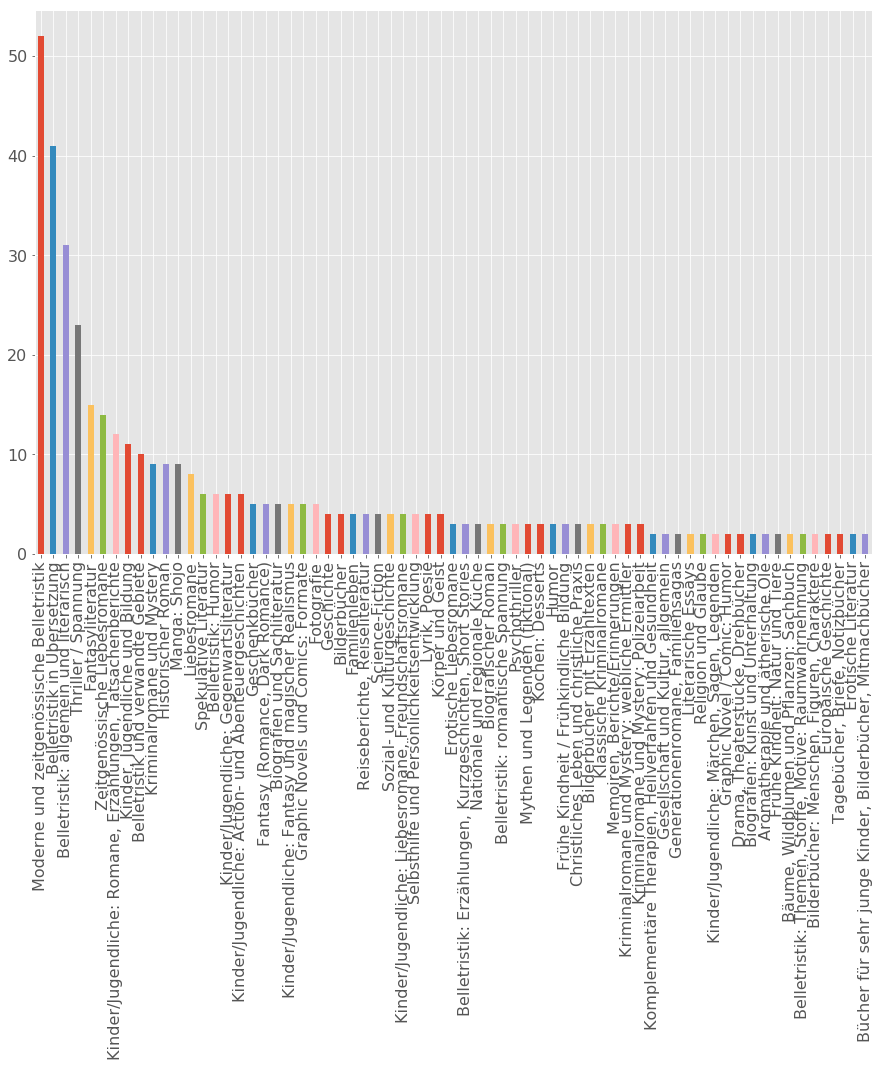

In [27]:
# Exploring the data distribution in our train and test set
# trying to filter out the long tail and keep only themes with count more than 3
def data_explore(dataFrame, attribute, threshold):
    counts = dataFrame[attribute].value_counts()
    counts1 =  counts[counts >= 1]
    print "DISTRIBUTION of THEMES in data is:"
    print counts1
    plot_data_theme = dataFrame[dataFrame[attribute].isin(counts[counts >= threshold].index)]
    plot_data_theme[attribute].value_counts().plot.bar(y=attribute, figsize=(15,10))

data_explore(train_data, "THEME", 2)

DISTRIBUTION of THEMES in data is:
Moderne und zeitgenössische Belletristik                         11
Belletristik in Übersetzung                                       5
Belletristik: allgemein und literarisch                           5
Manga: Shojo                                                      4
Zeitgenössische Liebesromane                                      3
Kinder, Jugendliche und Bildung                                   2
Biografischer Roman                                               2
Reiseberichte, Reiseliteratur                                     2
Fantasyliteratur                                                  2
Geschenkbücher                                                    2
Thriller / Spannung                                               2
Belletristik und verwandte Gebiete                                2
Komplementäre Therapien, Heilverfahren und Gesundheit             1
Ratgeber, Sachbuch: Psychologie                                   1
Lyrik, Poesie

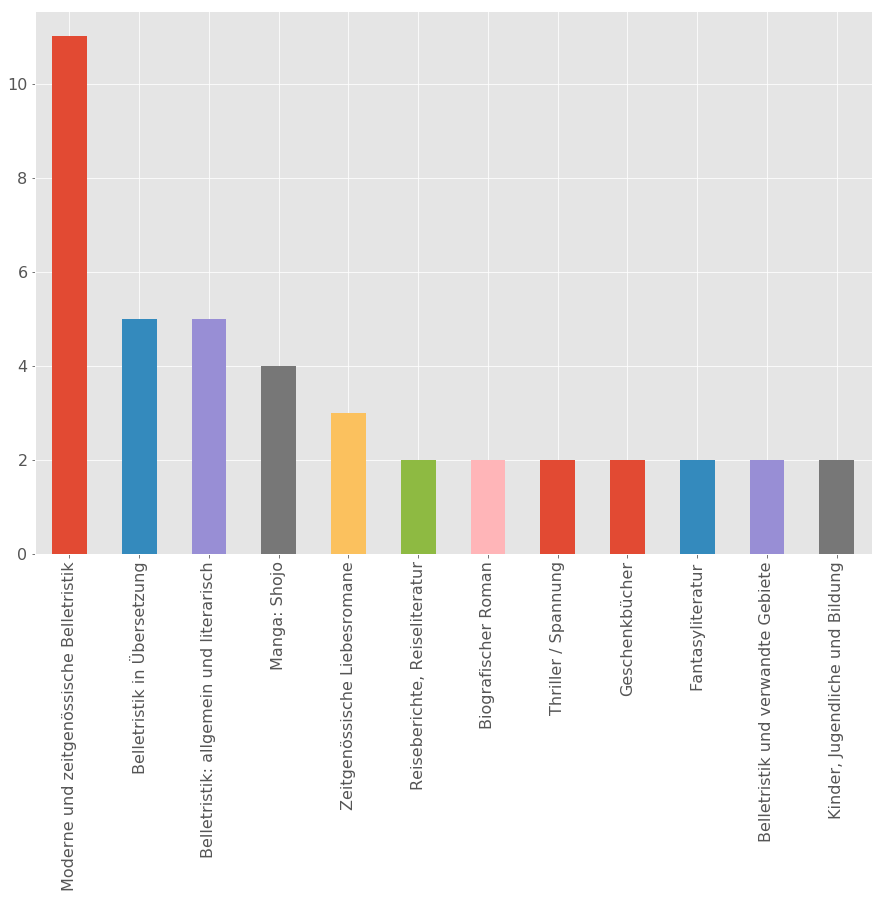

In [28]:
# Exploring the data distribution in our train and test set
# trying to filter out the long tail and keep only themes with count more than 3
data_explore(test_data, "THEME", 2)

In [29]:
# using Averaging over word2Vec(using fb fasttext word embeddings) approach
# wv = model_wiki_de
wv = model
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.layer1_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

# from itertools import islice
# list(islice(wv.vocab, 13000, 13020))

%time tokenized_train_text = [tokenize_only(text.decode('utf-8')) for text in train_data['ADDITIONALTEXT']]
%time tokenized_test_text = [tokenize_only(text.decode('utf-8')) for text in test_data['ADDITIONALTEXT']]
# stopwords removal
tokenized_train_text = [[word for word in text if word not in stop_words] for text in tokenized_train_text]
tokenized_test_text = [[word for word in text if word not in stop_words] for text in tokenized_test_text]

tokenized_train_text[0]
tokenized_test_text[0]

# wv.syn0norm[wv.vocab['konnt'].index]
# wv.vocab['konnt'].index
# # model.wv.vectors_norm[334797]
# model_wiki_de.vectors_norm[334797]
%time
X_train_word_average = word_averaging_list(wv,tokenized_train_text)
X_test_word_average = word_averaging_list(wv,tokenized_test_text)

# X_train_word_average[0]
%time
knn_naive_dv = KNeighborsClassifier(n_neighbors=3, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive_dv.fit(X_train_word_average, train_data['THEME'])
predicted = knn_naive_dv.predict(X_test_word_average)
evaluate_prediction(predicted, test_data['THEME'])

%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data['THEME'])
predicted = logreg.predict(X_test_word_average)
evaluate_prediction(predicted, test_data['THEME'])

print test_data.iloc()[28]['THEME']
for word in wv.most_similar(positive=[X_test_word_average[28]], restrict_vocab=100000, topn=30)[0:20]:
    print word[0]

for word in tokenized_test_text[28]:
    print word,

CPU times: user 906 ms, sys: 20.3 ms, total: 926 ms
Wall time: 920 ms
CPU times: user 173 ms, sys: 10.1 ms, total: 183 ms
Wall time: 181 ms
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).



accuracy 0.08695652173913043
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning:

invalid value encountered in true_divide



accuracy 0.09782608695652174
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
Kriminalromane und Mystery
naemlich
deshalb
tun
jedenfalls
offenbar
offenkundig
womoeglich
Fall
wohl
eben
anscheinend
zumal
allerdings
moeglicherweise
immer
denen
−_pnp
deswegen
gleichwohl
dennoch
Unfallserie stellt Mordkommisssion Rätsel beiden ermittelnden Kommissare tappen zunächst völlig Dunkeln Ermittlungsansätze verlaufen Sande private Gefühle spielen Rolle. Vergangenheit Opfer finden schließlich Gemeinsamkeit führt Abgründe unserer zivilisierten Gesellschaft Schließlich müssen schwere Entscheidung treffen


In [30]:
# Using Gensim doc2vec model, tagged documents are documents with 'ADDITIONAL TEXT' and tag as 'THEME'
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
train_tagged = train_data.apply(
    lambda r: TaggedDocument(words=tokenize_and_stopWordsRemoval(r['ADDITIONALTEXT'].decode('utf-8')), tags=[(r.THEME).decode('utf-8')]), axis=1)
print train_tagged.values[:2]
test_tagged = test_data.apply(
    lambda r: TaggedDocument(words=tokenize_and_stopWordsRemoval(r['ADDITIONALTEXT'].decode('utf-8')), tags=[(r.THEME).decode('utf-8')]), axis=1)
print test_tagged.values[:1]

%time
trainsent = train_tagged.values
testsent = test_tagged.values
print trainsent[1].tags
print testsent[1].words
# simple gensim doc2vec api
doc2vec_model = Doc2Vec(trainsent, workers=1, size=100, iter=20, dm=1, min_count=2)

train_targets, train_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])

[TaggedDocument(words=[u'Traum', u'Kind', u'Albtraum', u'Alex', u'Leslie', u'Twisden', u'verm\xf6gend', u'erfolgreich', u'gl\xfccklich', u'verheiratet', u'bereit', u'endlich', u'Eltern', u'obskurer', u'Arzt', u'Ljubljana', u'Paar', u'tats\xe4chlich', u'helfen', u'Zehn', u'Jahre', u'sp\xe4ter', u'einst', u'pr\xe4chtige', u'Haus', u'Twisdens', u'Ort', u'Grauens', u'verwandelt', u'obwohl', u'Alex', u'Leslie', u'Zwillinge', u'Adam', u'Alice', u'lieben', u'sperren', u'nachts', u'Zimmern', u'wissen', u'Kinder', u'Fressen', u'gern'], tags=[u'Belletristik in \xdcbersetzung'])
 TaggedDocument(words=[u'Ombr\xe9', u'hei\xdft', u'Trend', u'Farbverlauf', u'Mode', u'Beauty', u'mehr', u'wegzudenken', u'Endlich', u'Trend', u'selber', u'stricken', u'ganz', u'normaler', u'Wolle', u'Technik', u'ganz', u'einfach', u'Ergebnis', u'fasziniert', u'entstehen', u'tolle', u'Trendteile', u'M\xfctzen', u'T\xfccher', u'Loops', u'Kuschelsocken', u'vieles', u'mehr.'], tags=[u'Stricken und H\xe4keln'])]


2018-05-16 15:30:13,273 : INFO : collecting all words and their counts
2018-05-16 15:30:13,274 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-05-16 15:30:13,289 : INFO : collected 13642 word types and 164 unique tags from a corpus of 519 examples and 29290 words
2018-05-16 15:30:13,291 : INFO : Loading a fresh vocabulary
2018-05-16 15:30:13,306 : INFO : min_count=2 retains 4152 unique words (30% of original 13642, drops 9490)
2018-05-16 15:30:13,307 : INFO : min_count=2 leaves 19800 word corpus (67% of original 29290, drops 9490)
2018-05-16 15:30:13,318 : INFO : deleting the raw counts dictionary of 13642 items
2018-05-16 15:30:13,320 : INFO : sample=0.001 downsamples 15 most-common words
2018-05-16 15:30:13,321 : INFO : downsampling leaves estimated 19457 word corpus (98.3% of prior 19800)
2018-05-16 15:30:13,331 : INFO : estimated required memory for 4152 words and 100 dimensions: 5496000 bytes
2018-05-16 15:30:13,332 : INFO : resetting layer wei

[TaggedDocument(words=[u'Endlich', u'soweit', u'Hilfe', u'ALG', u'Hartz', u'Etliche', u'Tipps', u'Autors', u'seit', u'Jahren', u'Gebiet', u'spezialisiert', u'sorgen', u'daf\xfcr', u'endlich', u'Leistungen', u'erhalten', u'zustehen', u'Checklisten', u'\xdcbersichten', u'Etliche', u'Neuerungen', u'Erweiterungen', u'gegen\xfcber', u'Vorauflagen', u'Kraft', u'getretene', u'Rechtsvereinfachungsgesetz', u'ber\xfccksichtigt', u'ebenso', u'aktuelle', u'Urteile', u'wichtigsten', u'\xc4nderungen', u'\xdcberblick', u'wertvollen', u'Tipps', u'versehen', u'NEUE', u'Kapitel', u'SGB', u'Dauersanktion', u'vorl\xe4ufigen', u'Bescheiden', u'lauern', u'etliche', u'Fallen', u'totalen', u'Leistungsk\xfcrzung', u'Neuerungen', u'Eingliederungsvereinbarungen', u'gewohnt', u'Nahezu', u'Sanktionen', u'Einkommen', u'Verm\xf6gen', u'Kosten', u'Unterkunft', u'Heizung', u'Umz\xfcge', u'Aufrechnungen', u'Darlehen', u'R\xfcckforderungen', u'Mehrbedarfe', u'Sonderbedarfe', u'etc', u'Mustern', u'Klage', u'Widerspruch',

2018-05-16 15:30:13,488 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-16 15:30:13,489 : INFO : EPOCH - 2 : training on 29290 raw words (19963 effective words) took 0.1s, 382588 effective words/s
2018-05-16 15:30:13,544 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-16 15:30:13,545 : INFO : EPOCH - 3 : training on 29290 raw words (19971 effective words) took 0.1s, 376698 effective words/s
2018-05-16 15:30:13,594 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-16 15:30:13,596 : INFO : EPOCH - 4 : training on 29290 raw words (19976 effective words) took 0.0s, 409891 effective words/s
2018-05-16 15:30:13,642 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-16 15:30:13,643 : INFO : EPOCH - 5 : training on 29290 raw words (19979 effective words) took 0.0s, 445026 effective words/s
2018-05-16 15:30:13,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-16 15

In [20]:
%time
test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))

%time 
knn_test_predictions = [
    doc2vec_model.docvecs.most_similar([pred_vec], topn=1)[0][0]
    for pred_vec in test_regressors
]
evaluate_prediction(knn_test_predictions, test_targets, str(doc2vec_model))
print type(doc2vec_model.docvecs.doctags)
for key in doc2vec_model.docvecs.doctags:
    print key
# print test_tagged.values[1]
# print train_tagged.values[1]
sample_doc = doc2vec_model.docvecs[1]

# print [doc2vec_model.docvecs.doctags]
print doc2vec_model.docvecs.most_similar([sample_doc])
for word in doc2vec_model.most_similar([doc2vec_model.docvecs['Liebesromane']], topn=20):
    print word[0]

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning:

invalid value encountered in true_divide

2018-05-16 13:21:52,156 : INFO : precomputing L2-norms of doc weight vectors
/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

2018-05-16 13:21:52,174 : INFO : precomputing L2-norms of word weight vectors


accuracy 0.10909090909090909
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11 µs
accuracy 0.01818181818181818
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
<type 'dict'>
Ratgeber: Leben und Arbeiten im Ausland
Rollenspiele (auch Fantasy-Rollenspiele), Kriegsspiele
Spekulative Literatur
Handarbeit, Dekoration und Kunsthandwerk
Liebesromane
Belletristik: romantische Spannung
Wildwestromane (Westernroman)
Horrorliteratur und Übernatürliches
Fantasy (Romance, Dark Romance)
Unterrichtsmaterialien
Kinder/Jugendliche: Liebesromane, Freundschaftsromane
Bilderbücher mit Erzähltexten
Geschenkbücher
Zeichnung
Mythen und Legenden (fiktional)
Anthologien (nicht Lyrik)
Reiki
Historischer Roman
Belletr

In [39]:
# Now checking the performance on WMD - word mover's distance using pretrained word embeddings
for i in range(1,30):
    distance = model_wiki_de.wmdistance(trainsent[i-1].words, trainsent[i].words)
    print 'distance = %.4f between documents %d, %d' % (distance, i-1, i)
    print train_data.iloc()[i-1]['ADDITIONALTEXT']
    print train_data.iloc()[i]['ADDITIONALTEXT']

for sent in trainsent[2:6]:
    print "\n", sent.tags 
    for word in sent.words:
        print word,
for sent in trainsent[19:26]:
    print "\n", sent.tags 
    for word in sent.words:
        print word,

2018-05-09 14:50:58,529 : INFO : Removed 14 and 23 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,530 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,532 : INFO : built Dictionary(43 unique tokens: [u'stets', u'ahnend', u'gesch\xe4tzt', u'heran', u'geben']...) from 2 documents (total 45 corpus positions)
2018-05-09 14:50:58,547 : INFO : Removed 23 and 44 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,549 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,551 : INFO : built Dictionary(55 unique tokens: [u'ahnend', u'heran', u'feststellen', u'gesch\xe4tzt', u'dient']...) from 2 documents (total 56 corpus positions)
2018-05-09 14:50:58,569 : INFO : Removed 44 and 27 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,570 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,572 : INFO : built Dictionary(48 unique tokens: [u'dient', u'fes

distance = 4.0174 between documents 0, 1
<p>Asta und Yuno könnten unterschiedlicher nicht sein. Während Asta tollpatschig, laut und ohne magische Fähigkeiten ständig für Aufruhr sorgt, ist Yuno stets besonnen, ruhig und besitzt ein angeborenes Talent für Magie. Doch ein Versprechen verbindet sie, denn sie wollen beide König der Magier werden und geben alles dafür, ihr Ziel zu erreichen. Und so kommt es, dass aus den Kindheitsfreunden Rivalen werden. </p>
<p>Gabriel, der General der Königin der Vampire, wird von allen geschätzt und respektiert. Jedoch weiß niemand etwas über seine Vergangenheit. Er ist darum bemüht, keinen Vampir zu nah an sich heran zu lassen. Er verschließt sich vor allem, bis ihn die unterdrückten Gefühle übermannen und er sich eingestehen muss, dass er noch eine Rechnung offen hat. Nämlich mit sich selbst. Lucy, eine Vampirin, die ihm nahe steht, bringt die Mauer, die er um sich herum errichtet hat, zum Einstürzen. Doch für Gabriel kommt es nicht in Frage, etwas mit

2018-05-09 14:50:58,750 : INFO : Removed 51 and 28 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,752 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,753 : INFO : built Dictionary(56 unique tokens: [u'k\xfcnstlerische', u'all', u'teils', u'ausgerichteten', u'bereit']...) from 2 documents (total 62 corpus positions)
2018-05-09 14:50:58,769 : INFO : Removed 28 and 17 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,771 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,772 : INFO : built Dictionary(32 unique tokens: [u'k\xfcnstlerische', u'all', u'schl\xe4gt', u'bereit', u'verschwundenen']...) from 2 documents (total 33 corpus positions)
2018-05-09 14:50:58,779 : INFO : Removed 17 and 71 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,781 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,782 : INFO : built Dictionary(45 unique tok

distance = 4.6029 between documents 14, 15
<p>Häkeln Sie Statements!<br>Schals, Tücher und Loops bilden das i-Tüpfelchen auf jedem Outfit. Selbst gehäkelt und individuell gestaltet sind sie dazu modische Statements, die alle Blicke auf sich ziehen.<br>Dabei bieten Ihnen unsere Modelle Vorschläge für jeden Anlass und jede Jahreszeit: von Schals mit romantischem Blüten-Lochmuster über sportliche Loops in Knallfarben, flauschig warme Long-Schals  bis hin zu luftig-eleganten Schultertüchern.<br>Eine ausführliche und bebilderte Häkelschule erklärt Anfängern und Wiedereinsteigern Schritt für Schritt die grundlegenden Techniken. Erprobte Anleitungen bringen Häkelspaß und schnellen Erfolg. Da stellt sich nur noch eine Frage: Welches wird Ihr erstes Projekt?</p>
<p>Coaching ist ein positives Vorhaben, das von den Ressourcen der Menschen und von ihrem Glauben an sich selbst ausgeht. Forschungen aus dem Bereich der Positiven Psychologie untermauern dies und regen zu Verfeinerungen der Praxis an.I

2018-05-09 14:50:58,956 : INFO : Removed 26 and 34 OOV words from document 1 and 2 (respectively).
2018-05-09 14:50:58,957 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-09 14:50:58,959 : INFO : built Dictionary(45 unique tokens: [u'all', u'erotische', u'ganz', u'ben\xf6tigt', u'sage']...) from 2 documents (total 48 corpus positions)


distance = 4.2875 between documents 27, 28
Winter 1947 in Hohenschöpping im Havelland. Draußen herrschen klirrende Kälte, Eis und Schnee. Im Gasthaus &amp;#8222;Zum weißen Schwan&amp;#8220; ist das Gastwirtsehepaar bereits zu Bett gegangen, die Töchter Elfriede und Hildegard haben ebenfalls ihre Schlafkammer aufgesucht. Was soll man auch anfangen, wenn wieder einmal Stromsperre herrscht und das ganze Haus dunkel ist? Hildegard ist vor dem Einschlafen in die Betrachtung des Vollmondes vertieft, als es plötzlich unten laut an die Tür zur Gaststube klopft. Im Hof stehen drei Russen, die Einlaß begehren. Da sie sich nicht wegschicken lassen, öffnen die beiden jungen Frauen schließlich&amp;#8230;<br />Was an diesem Abend einen zarten, kaum wahrnehmbaren Anfang nimmt, ist die bewegende Geschichte der deutschen Gastwirtstochter Hildegard und des jungen russischen Soldaten Igor. Zu einer Zeit, in der die Angst vor Vergewaltigungen bei vielen Frauen im russisch besetzten Teil Deutschlands noch 

In [105]:
# Normalizing word vectors do improve "intutitive results". 
# Documents which are similar are infact in close neighborhood.
from time import time
# Normalizing word2vec vectors.
start = time()

model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

start = time()

model02.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

start = time()

model_wiki_de.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

2018-05-18 15:59:34,381 : INFO : precomputing L2-norms of word weight vectors
2018-05-18 15:59:40,436 : INFO : precomputing L2-norms of word weight vectors


Cell took 6.05 seconds to run.


2018-05-18 15:59:58,960 : INFO : precomputing L2-norms of word weight vectors


Cell took 18.52 seconds to run.
Cell took 22.33 seconds to run.


In [46]:
# Now checking the performance on WMD - word mover's distance using pretrained word embeddings
for i in range(1,30):
    distance = model.wmdistance(trainsent[i-1].words, trainsent[i].words)
    print 'distance = %.4f between documents %d, %d' % (distance, i-1, i)

for i in range(1,30):
    distance = model02.wmdistance(trainsent[i-1].words, trainsent[i].words)
    print 'distance = %.4f between documents %d, %d' % (distance, i-1, i)

2018-05-11 15:27:37,218 : INFO : Removed 8 and 13 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,220 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,222 : INFO : built Dictionary(56 unique tokens: [u'stets', u'ahnend', u'Mauer', u'lassen', u'Asta']...) from 2 documents (total 61 corpus positions)
2018-05-11 15:27:37,252 : INFO : Removed 13 and 16 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,254 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,256 : INFO : built Dictionary(82 unique tokens: [u'ahnend', u'heran', u'feststellen', u'stehen', u'Mauer']...) from 2 documents (total 94 corpus positions)
2018-05-11 15:27:37,296 : INFO : Removed 16 and 13 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,297 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,299 : INFO : built Dictionary(82 unique tokens: [u'Russlands', u'dient', u'fes

distance = 1.0594 between documents 0, 1
distance = 1.0220 between documents 1, 2
distance = 1.0893 between documents 2, 3
distance = 1.0663 between documents 3, 4
distance = 0.9867 between documents 4, 5
distance = 1.0258 between documents 5, 6
distance = 1.1087 between documents 6, 7


2018-05-11 15:27:37,480 : INFO : Removed 16 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,482 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,483 : INFO : built Dictionary(99 unique tokens: [u'eindringlicher', u'all', u'Freiheit', u'Wehrmacht', u'Jahre']...) from 2 documents (total 109 corpus positions)
2018-05-11 15:27:37,538 : INFO : Removed 6 and 4 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,540 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,541 : INFO : built Dictionary(70 unique tokens: [u'ferne', u'lebendig', u'konnte', u'Wehrmacht', u'deutschen']...) from 2 documents (total 74 corpus positions)
2018-05-11 15:27:37,562 : INFO : Removed 4 and 23 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,564 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,566 : INFO : built Dictionary(77 unique tokens: [u'Macht', u'fe

distance = 1.0589 between documents 7, 8
distance = 1.0433 between documents 8, 9
distance = 1.1075 between documents 9, 10
distance = 1.1047 between documents 10, 11
distance = 1.0862 between documents 11, 12
distance = 1.0909 between documents 12, 13
distance = 1.0854 between documents 13, 14


2018-05-11 15:27:37,716 : INFO : Removed 15 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,717 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,718 : INFO : built Dictionary(102 unique tokens: [u'all', u'Andreas', u'Forschung', u'Glauben', u'immer']...) from 2 documents (total 120 corpus positions)
2018-05-11 15:27:37,780 : INFO : Removed 6 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,781 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,783 : INFO : built Dictionary(61 unique tokens: [u'all', u'Andreas', u'teils', u'Schein', u'Gedichte']...) from 2 documents (total 66 corpus positions)
2018-05-11 15:27:37,802 : INFO : Removed 6 and 25 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,803 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,805 : INFO : built Dictionary(98 unique tokens: [u'Respekt', u'Erstmals', u'Fr

distance = 1.0729 between documents 14, 15
distance = 1.0479 between documents 15, 16
distance = 1.1268 between documents 16, 17
distance = 1.1071 between documents 17, 18


2018-05-11 15:27:37,919 : INFO : Removed 4 and 13 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,920 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,922 : INFO : built Dictionary(75 unique tokens: [u'unsicher', u'vorzeitig', u'Finden', u'Bald', u'Eltern']...) from 2 documents (total 90 corpus positions)
2018-05-11 15:27:37,952 : INFO : Removed 13 and 11 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,953 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,955 : INFO : built Dictionary(83 unique tokens: [u'vorzeitig', u'Mut', u'Finden', u'kennenzulernen', u'schwierige']...) from 2 documents (total 103 corpus positions)
2018-05-11 15:27:37,991 : INFO : Removed 11 and 2 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,993 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,994 : INFO : built Dictionary(87 unique tokens: [u'gerontopsyc

distance = 1.0902 between documents 18, 19
distance = 1.0660 between documents 19, 20
distance = 0.9773 between documents 20, 21
distance = 1.0378 between documents 21, 22
distance = 1.1060 between documents 22, 23
distance = 1.1299 between documents 23, 24
distance = 1.0684 between documents 24, 25
distance = 1.1064 between documents 25, 26


2018-05-11 15:27:38,180 : INFO : Removed 13 and 16 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,181 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,183 : INFO : built Dictionary(83 unique tokens: [u'Elfriede', u'Einschlafen', u'Hof', u'Habt', u'Betrachtung']...) from 2 documents (total 94 corpus positions)
2018-05-11 15:27:38,217 : INFO : Removed 16 and 15 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,219 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,221 : INFO : built Dictionary(73 unique tokens: [u'Mut', u'all', u'Lebenserwartung', u'Zahl', u'ganz']...) from 2 documents (total 77 corpus positions)
2018-05-11 15:27:38,243 : INFO : Removed 3 and 2 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,245 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,246 : INFO : built Dictionary(72 unique tokens: [u'stets', u'Vergangenhe

distance = 1.0661 between documents 26, 27
distance = 1.0414 between documents 27, 28
distance = 1.0949 between documents 28, 29
distance = 0.4917 between documents 0, 1
distance = 0.4906 between documents 1, 2


2018-05-11 15:27:38,384 : INFO : Removed 8 and 3 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,386 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,387 : INFO : built Dictionary(74 unique tokens: [u'Schwarzer', u'geboren', u'Gier', u'helfen', u'motivierende']...) from 2 documents (total 76 corpus positions)
2018-05-11 15:27:38,410 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,411 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,413 : INFO : built Dictionary(83 unique tokens: [u'bedrohen', u'geboren', u'Gier', u'Jahre', u'voll']...) from 2 documents (total 89 corpus positions)
2018-05-11 15:27:38,448 : INFO : Removed 1 and 10 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,449 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,451 : INFO : built Dictionary(88 unique tokens: [u'Hai', u'geboren', u'Jahr

distance = 0.5113 between documents 2, 3
distance = 0.5169 between documents 3, 4
distance = 0.4820 between documents 4, 5
distance = 0.5114 between documents 5, 6
distance = 0.5453 between documents 6, 7
distance = 0.5222 between documents 7, 8


2018-05-11 15:27:38,666 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,667 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,669 : INFO : built Dictionary(79 unique tokens: [u'ferne', u'lebendig', u'konnte', u'Wehrmacht', u'deutschen']...) from 2 documents (total 83 corpus positions)
2018-05-11 15:27:38,697 : INFO : Removed 1 and 7 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,699 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,700 : INFO : built Dictionary(94 unique tokens: [u'Macht', u'unserer', u'eigenen', u'verliert', u'pers\xf6nliche']...) from 2 documents (total 97 corpus positions)
2018-05-11 15:27:38,733 : INFO : Removed 7 and 3 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,734 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,736 : INFO : built Dictionary(106 unique tokens: [u'Macht', u'un

distance = 0.4962 between documents 8, 9
distance = 0.5494 between documents 9, 10
distance = 0.5481 between documents 10, 11
distance = 0.5304 between documents 11, 12
distance = 0.5493 between documents 12, 13
distance = 0.5588 between documents 13, 14


2018-05-11 15:27:38,900 : INFO : Removed 7 and 0 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,902 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,904 : INFO : built Dictionary(116 unique tokens: [u'all', u'Andreas', u'Forschung', u'Glauben', u'immer']...) from 2 documents (total 134 corpus positions)
2018-05-11 15:27:38,982 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,983 : INFO : built Dictionary(72 unique tokens: [u'k\xfcnstlerische', u'all', u'Andreas', u'teils', u'Dollar']...) from 2 documents (total 78 corpus positions)
2018-05-11 15:27:39,013 : INFO : Removed 0 and 12 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,014 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,016 : INFO : built Dictionary(113 unique tokens: [u'Respekt', u'Erstmals', u'Frage', u'Verbindung', u'pers\xf6nliche']...) from 2 documents (total 124 corpus positions)

distance = 0.5460 between documents 14, 15
distance = 0.5143 between documents 15, 16
distance = 0.5601 between documents 16, 17
distance = 0.5551 between documents 17, 18


2018-05-11 15:27:39,181 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,183 : INFO : built Dictionary(92 unique tokens: [u'f\xfchren', u'Eltern', u'Trennung', u'Sinn', u'entdeckt']...) from 2 documents (total 107 corpus positions)
2018-05-11 15:27:39,232 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,235 : INFO : built Dictionary(105 unique tokens: [u'verlassen', u'Frage', u'immer', u'st\xe4rker', u'Konflikt']...) from 2 documents (total 126 corpus positions)
2018-05-11 15:27:39,302 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,303 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,305 : INFO : built Dictionary(99 unique tokens: [u'beide', u'Frage', u'immer', u'erfahren', u'psychiatrischen']...) from 2 documents (total 111 corpus positions)
20

distance = 0.5419 between documents 18, 19
distance = 0.5142 between documents 19, 20
distance = 0.4700 between documents 20, 21
distance = 0.5192 between documents 21, 22
distance = 0.5725 between documents 22, 23


2018-05-11 15:27:39,409 : INFO : Removed 2 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,411 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,412 : INFO : built Dictionary(110 unique tokens: [u'endg\xfcltig', u'Castor', u'Mosel', u'Tote', u'nachdem']...) from 2 documents (total 115 corpus positions)
2018-05-11 15:27:39,488 : INFO : Removed 6 and 3 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,489 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,491 : INFO : built Dictionary(82 unique tokens: [u'all', u'sch\xf6nste', u'tats\xe4chlich', u'Hauch', u'V\xf6lker']...) from 2 documents (total 88 corpus positions)
2018-05-11 15:27:39,529 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,531 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,532 : INFO : built Dictionary(113 unique tokens: [u'Einschlafen'

distance = 0.5762 between documents 23, 24
distance = 0.5073 between documents 24, 25
distance = 0.5239 between documents 25, 26
distance = 0.5278 between documents 26, 27


2018-05-11 15:27:39,610 : INFO : built Dictionary(103 unique tokens: [u'Einschlafen', u'all', u'Winter', u'Soldaten', u'sage']...) from 2 documents (total 114 corpus positions)
2018-05-11 15:27:39,667 : INFO : Removed 9 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,668 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,670 : INFO : built Dictionary(89 unique tokens: [u'all', u'ganz', u'ben\xf6tigt', u'sage', u'Autonarr']...) from 2 documents (total 93 corpus positions)


distance = 0.5251 between documents 27, 28
distance = 0.5591 between documents 28, 29


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

2018-05-18 14:53:29,135 : INFO : precomputing L2-norms of word weight vectors
2018-05-18 14:53:50,382 : INFO : Removed 74 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:50,387 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:50,388 : INFO : built Dictionary(78 unique tokens: [u'unabh\xe4ngiger', u'ausgezeichnet', u'schwimmende', u'spricht', u'braucht']

2018-05-18 14:53:50,741 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:50,742 : INFO : built Dictionary(54 unique tokens: [u'dickk\xf6pfige', u'scheut', u'eigenen', u'erschienen', u'leiv']...) from 2 documents (total 54 corpus positions)
2018-05-18 14:53:50,757 : INFO : Removed 23 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:50,758 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:50,760 : INFO : built Dictionary(48 unique tokens: [u'kr\xe4hen', u'gleichnamige', u'eigenen', u'ganz', u'immer']...) from 2 documents (total 52 corpus positions)
2018-05-18 14:53:50,772 : INFO : Removed 7 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:50,774 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:50,775 : INFO : built Dictionary(40 unique tokens: [u'kr\xe4hen', u'eigenen', u'ganz', u'immer', u'erleben']...) from 2 documents (total 41 corpus positions)
201

2018-05-18 14:53:51,104 : INFO : built Dictionary(62 unique tokens: [u'dickk\xf6pfige', u'zudem', u'erschienen', u'genie\xdfen', u'ungeheure']...) from 2 documents (total 65 corpus positions)
2018-05-18 14:53:51,125 : INFO : Removed 30 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:51,127 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:51,128 : INFO : built Dictionary(48 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'mediterran', u'wenig']...) from 2 documents (total 49 corpus positions)
2018-05-18 14:53:51,141 : INFO : Removed 53 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:51,143 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:51,144 : INFO : built Dictionary(59 unique tokens: [u'kr\xe4hen', u'abgewehrt', u'gleichnamige', u'eigenen', u'erweiterten']...) from 2 documents (total 62 corpus positions)
2018-05-18 14:53:51,164 : INFO : Removed 28 and 50 OOV words 

2018-05-18 14:53:51,483 : INFO : built Dictionary(59 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'ebenfalls', u'singen']...) from 2 documents (total 62 corpus positions)
2018-05-18 14:53:51,503 : INFO : Removed 27 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:51,504 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:51,505 : INFO : built Dictionary(37 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'perfekt', u'gemeinsam']...) from 2 documents (total 38 corpus positions)
2018-05-18 14:53:51,512 : INFO : Removed 34 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:51,513 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:51,515 : INFO : built Dictionary(44 unique tokens: [u'kr\xe4hen', u'schwimmende', u'tats\xe4chlich', u'eigenen', u'erschienen']...) from 2 documents (total 44 corpus positions)
2018-05-18 14:53:51,524 : INFO : Removed 20 and 50 OOV words from

2018-05-18 14:53:51,830 : INFO : built Dictionary(55 unique tokens: [u'bevor', u'schwimmende', u'eigenen', u'genau', u'erschienen']...) from 2 documents (total 56 corpus positions)
2018-05-18 14:53:51,848 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:51,849 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:51,850 : INFO : built Dictionary(52 unique tokens: [u'kl\xfcger', u'schwimmende', u'eigenen', u'ganz', u'gro\xdfen']...) from 2 documents (total 56 corpus positions)
2018-05-18 14:53:51,864 : INFO : Removed 31 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:51,866 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:51,867 : INFO : built Dictionary(50 unique tokens: [u'gew\xf6hnen', u'kr\xe4hen', u'zerst\xf6rt', u'schwimmende', u'erh\xe4ngten']...) from 2 documents (total 51 corpus positions)
2018-05-18 14:53:51,879 : INFO : Removed 43 and 50 OOV words from d

2018-05-18 14:53:52,219 : INFO : built Dictionary(38 unique tokens: [u'heran', u'verr\xe4terischen', u'eigenen', u'erschienen', u'charmante']...) from 2 documents (total 38 corpus positions)
2018-05-18 14:53:52,227 : INFO : Removed 1 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:52,228 : INFO : At least one of the documents had no words that werein the vocabulary. Aborting (returning inf).
2018-05-18 14:53:52,230 : INFO : Removed 7 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:52,231 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:52,232 : INFO : built Dictionary(32 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'schr\xe4ges', u'gemeinsam']...) from 2 documents (total 32 corpus positions)
2018-05-18 14:53:52,236 : INFO : Removed 51 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:52,238 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:52,2

2018-05-18 14:53:52,659 : INFO : built Dictionary(31 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'danach', u'vorliegenden']...) from 2 documents (total 32 corpus positions)
2018-05-18 14:53:52,663 : INFO : Removed 55 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:52,664 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:52,666 : INFO : built Dictionary(65 unique tokens: [u'polierten', u'stolz', u'schl\xe4gt', u'spricht', u'begeistert']...) from 2 documents (total 68 corpus positions)
2018-05-18 14:53:52,687 : INFO : Removed 66 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:52,689 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:52,690 : INFO : built Dictionary(71 unique tokens: [u'kr\xe4hen', u'f\xfchren', u'gefeierten', u'starken', u'eigenen']...) from 2 documents (total 71 corpus positions)
2018-05-18 14:53:52,721 : INFO : Removed 45 and 50 OOV words from docume

2018-05-18 14:53:53,086 : INFO : Removed 59 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,088 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,089 : INFO : built Dictionary(76 unique tokens: [u'stets', u'fester', u'spricht', u'denen', u'schwierige']...) from 2 documents (total 78 corpus positions)
2018-05-18 14:53:53,114 : INFO : Removed 36 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,115 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,117 : INFO : built Dictionary(64 unique tokens: [u'kr\xe4hen', u'sprechen', u'geboren', u'improvisiertes', u'eigenen']...) from 2 documents (total 64 corpus positions)
2018-05-18 14:53:53,136 : INFO : Removed 28 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,138 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,139 : INFO : built Dictionary(54 unique tokens: [u'kr\xe4h

2018-05-18 14:53:53,446 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,448 : INFO : built Dictionary(35 unique tokens: [u'kr\xe4hen', u'geboren', u'eigenen', u'schwimmende', u'erschienen']...) from 2 documents (total 36 corpus positions)
2018-05-18 14:53:53,453 : INFO : Removed 18 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,454 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,456 : INFO : built Dictionary(38 unique tokens: [u'kr\xe4hen', u'trauen', u'eigenen', u'erschienen', u'gemeinsam']...) from 2 documents (total 38 corpus positions)
2018-05-18 14:53:53,463 : INFO : Removed 36 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,464 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,465 : INFO : built Dictionary(67 unique tokens: [u'kr\xe4hen', u'schwimmende', u'eigenen', u'ganz', u'immer']...) from 2 documents (total 68 corpus po

2018-05-18 14:53:53,790 : INFO : built Dictionary(47 unique tokens: [u'kr\xe4hen', u'gelegen', u'mexikanische', u'voranzutreiben', u'gleichnamige']...) from 2 documents (total 47 corpus positions)
2018-05-18 14:53:53,801 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,802 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,803 : INFO : built Dictionary(57 unique tokens: [u'kr\xe4hen', u'sprechen', u'kennenzulernen', u'denen', u'braucht']...) from 2 documents (total 58 corpus positions)
2018-05-18 14:53:53,818 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:53,820 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:53,821 : INFO : built Dictionary(45 unique tokens: [u'kr\xe4hen', u'flammen', u'eigenen', u'schwimmende', u'erschienen']...) from 2 documents (total 45 corpus positions)
2018-05-18 14:53:53,832 : INFO : Removed 24 and 50 OOV wor

2018-05-18 14:53:54,089 : INFO : built Dictionary(52 unique tokens: [u'gliedert', u'dickk\xf6pfige', u'eigenen', u'erschienen', u'beiderseits']...) from 2 documents (total 55 corpus positions)
2018-05-18 14:53:54,103 : INFO : Removed 46 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:54,104 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:54,106 : INFO : built Dictionary(55 unique tokens: [u'dickk\xf6pfige', u'legend\xe4ren', u'schwimmende', u'spricht', u'scheiterte']...) from 2 documents (total 62 corpus positions)
2018-05-18 14:53:54,120 : INFO : Removed 21 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:54,122 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:54,123 : INFO : built Dictionary(37 unique tokens: [u'kr\xe4hen', u'schnuckelig', u'spricht', u'eigenen', u'erschienen']...) from 2 documents (total 38 corpus positions)
2018-05-18 14:53:54,130 : INFO : Removed 31 and 50

2018-05-18 14:53:54,451 : INFO : built Dictionary(70 unique tokens: [u'entstehenden', u'f\xe4llt', u'eigenen', u'schwimmende', u'erschienen']...) from 2 documents (total 71 corpus positions)
2018-05-18 14:53:54,474 : INFO : Removed 83 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:54,475 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:54,477 : INFO : built Dictionary(70 unique tokens: [u'm\xf6gen', u'kr\xe4hen', u'f\xfchren', u'spricht', u'denen']...) from 2 documents (total 72 corpus positions)
2018-05-18 14:53:54,503 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:54,504 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:54,506 : INFO : built Dictionary(48 unique tokens: [u'kr\xe4hen', u'junges', u'eigenen', u'erschienen', u'traurig']...) from 2 documents (total 49 corpus positions)
2018-05-18 14:53:54,517 : INFO : Removed 34 and 50 OOV words from document

2018-05-18 14:53:54,803 : INFO : built Dictionary(38 unique tokens: [u'kr\xe4hen', u'spricht', u'eigenen', u'erschienen', u'landet']...) from 2 documents (total 38 corpus positions)
2018-05-18 14:53:54,811 : INFO : Removed 34 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:54,812 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:54,813 : INFO : built Dictionary(54 unique tokens: [u'kr\xe4hen', u'lebendig', u'damals', u'deutschen', u'innerhalb']...) from 2 documents (total 54 corpus positions)
2018-05-18 14:53:54,827 : INFO : Removed 54 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:54,828 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:54,829 : INFO : built Dictionary(56 unique tokens: [u'kr\xe4hen', u'f\xfchren', u'verschl\xe4gt', u'engagiert', u'eigenen']...) from 2 documents (total 58 corpus positions)
2018-05-18 14:53:54,844 : INFO : Removed 39 and 50 OOV words from docume

2018-05-18 14:53:55,169 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,171 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,172 : INFO : built Dictionary(51 unique tokens: [u'kr\xe4hen', u'spricht', u'eigenen', u'gefesselt', u'bewegen']...) from 2 documents (total 53 corpus positions)
2018-05-18 14:53:55,185 : INFO : Removed 47 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,186 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,188 : INFO : built Dictionary(56 unique tokens: [u'dickk\xf6pfige', u'weitgehend', u'spricht', u'mitten', u'eigenen']...) from 2 documents (total 57 corpus positions)
2018-05-18 14:53:55,202 : INFO : Removed 80 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,204 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,205 : INFO : built Dictionary(90 unique tokens: [u'ei

2018-05-18 14:53:55,537 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,538 : INFO : built Dictionary(62 unique tokens: [u'kr\xe4hen', u'gefallen', u'endg\xfcltig', u'eigenen', u'atomaren']...) from 2 documents (total 62 corpus positions)
2018-05-18 14:53:55,556 : INFO : Removed 18 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,557 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,559 : INFO : built Dictionary(34 unique tokens: [u'hilft', u'kr\xe4hen', u'eigenen', u'erschienen', u'immer']...) from 2 documents (total 34 corpus positions)
2018-05-18 14:53:55,564 : INFO : Removed 35 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,565 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,566 : INFO : built Dictionary(53 unique tokens: [u'schaurigen', u'schwimmende', u'tats\xe4chlich', u'entschl\xfcsseln', u'eigenen']...) from 2 documents (t

2018-05-18 14:53:55,860 : INFO : built Dictionary(47 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'bleibt', u'westlichen']...) from 2 documents (total 47 corpus positions)
2018-05-18 14:53:55,872 : INFO : Removed 28 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,874 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,875 : INFO : built Dictionary(48 unique tokens: [u'schrullige', u'dickk\xf6pfige', u'schwimmende', u'eigenen', u'erschienen']...) from 2 documents (total 48 corpus positions)
2018-05-18 14:53:55,887 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:55,888 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:55,889 : INFO : built Dictionary(48 unique tokens: [u'kr\xe4hen', u'schwimmende', u'eigenen', u'gutbesuchte', u'herausfinden']...) from 2 documents (total 48 corpus positions)
2018-05-18 14:53:55,903 : INFO : Removed 37 and 50 OOV 

2018-05-18 14:53:56,218 : INFO : Removed 22 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,219 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,220 : INFO : built Dictionary(38 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'vollziehen', u'f\xfchrt']...) from 2 documents (total 39 corpus positions)
2018-05-18 14:53:56,228 : INFO : Removed 15 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,229 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,231 : INFO : built Dictionary(37 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'gemeinsam', u'reimen']...) from 2 documents (total 39 corpus positions)
2018-05-18 14:53:56,238 : INFO : Removed 34 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,239 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,241 : INFO : built Dictionary(40 unique tokens: [u'

2018-05-18 14:53:56,527 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,529 : INFO : built Dictionary(55 unique tokens: [u'kr\xe4hen', u'starkem', u'erschienen', u'abwechslungsreich', u'zahlen']...) from 2 documents (total 55 corpus positions)
2018-05-18 14:53:56,546 : INFO : Removed 17 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,547 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,549 : INFO : built Dictionary(36 unique tokens: [u'kr\xe4hen', u'grausamen', u'eigenen', u'erschienen', u'lieben']...) from 2 documents (total 37 corpus positions)
2018-05-18 14:53:56,557 : INFO : Removed 35 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,558 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,560 : INFO : built Dictionary(52 unique tokens: [u'kr\xe4hen', u'spricht', u'eigenen', u'erschienen', u'au\xdferirdischer']...) from 2 documents 

2018-05-18 14:53:56,865 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,867 : INFO : built Dictionary(67 unique tokens: [u'dickk\xf6pfige', u'schwimmende', u'unterzieht', u'sicher', u'eigenen']...) from 2 documents (total 67 corpus positions)
2018-05-18 14:53:56,888 : INFO : Removed 24 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,890 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,891 : INFO : built Dictionary(43 unique tokens: [u'kr\xe4hen', u'einsamen', u'eigenen', u'erschienen', u'leiv']...) from 2 documents (total 43 corpus positions)
2018-05-18 14:53:56,900 : INFO : Removed 23 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:56,901 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:56,903 : INFO : built Dictionary(45 unique tokens: [u'gef\xf6rdert', u'kr\xe4hen', u'schwimmende', u'eigenen', u'erschienen']...) from 2 documents (tota

2018-05-18 14:53:57,246 : INFO : Removed 37 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,248 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,249 : INFO : built Dictionary(37 unique tokens: [u'kr\xe4hen', u'entwischt', u'eigenen', u'erschienen', u'gro\xdfen']...) from 2 documents (total 38 corpus positions)
2018-05-18 14:53:57,255 : INFO : Removed 23 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,256 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,258 : INFO : built Dictionary(39 unique tokens: [u'kr\xe4hen', u'schwimmende', u'eigenen', u'erschienen', u'aufgef\xfchrt']...) from 2 documents (total 41 corpus positions)
2018-05-18 14:53:57,266 : INFO : Removed 27 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,267 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,269 : INFO : built Dictionary(47 unique to

2018-05-18 14:53:57,554 : INFO : Removed 26 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,555 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,557 : INFO : built Dictionary(43 unique tokens: [u'kr\xe4hen', u'gefallen', u'schwimmende', u'eigenen', u'erschienen']...) from 2 documents (total 43 corpus positions)
2018-05-18 14:53:57,567 : INFO : Removed 54 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,568 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,570 : INFO : built Dictionary(62 unique tokens: [u'kr\xe4hen', u'feststellen', u'schwimmende', u'eigenen', u'erschienen']...) from 2 documents (total 65 corpus positions)
2018-05-18 14:53:57,588 : INFO : Removed 58 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,589 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,590 : INFO : built Dictionary(52 unique tok

2018-05-18 14:53:57,898 : INFO : Removed 74 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,899 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,901 : INFO : built Dictionary(72 unique tokens: [u'mythischen', u'kr\xe4hen', u'schwimmende', u'gleichnamige', u'belebt']...) from 2 documents (total 76 corpus positions)
2018-05-18 14:53:57,927 : INFO : Removed 30 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,928 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,929 : INFO : built Dictionary(39 unique tokens: [u'kr\xe4hen', u'stehen', u'zudem', u'erschienen', u'grausigen']...) from 2 documents (total 39 corpus positions)
2018-05-18 14:53:57,936 : INFO : Removed 36 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:57,938 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:57,939 : INFO : built Dictionary(55 unique tokens: [

2018-05-18 14:53:58,252 : INFO : Removed 19 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,253 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,255 : INFO : built Dictionary(39 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'anonymer', u'landet']...) from 2 documents (total 40 corpus positions)
2018-05-18 14:53:58,262 : INFO : Removed 22 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,263 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,265 : INFO : built Dictionary(39 unique tokens: [u'scheitern', u'eigenen', u'b\xfcrgerlichen', u'erschienen', u'diplomatischen']...) from 2 documents (total 39 corpus positions)
2018-05-18 14:53:58,272 : INFO : Removed 24 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,273 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,275 : INFO : built Dictionary(48 unique t

2018-05-18 14:53:58,532 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,533 : INFO : built Dictionary(41 unique tokens: [u'hilft', u'kr\xe4hen', u'eigenen', u'erschienen', u'wildesten']...) from 2 documents (total 41 corpus positions)
2018-05-18 14:53:58,541 : INFO : Removed 12 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,543 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,544 : INFO : built Dictionary(41 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'bereit', u'unheimliche']...) from 2 documents (total 41 corpus positions)
2018-05-18 14:53:58,553 : INFO : Removed 27 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,554 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,555 : INFO : built Dictionary(46 unique tokens: [u'kr\xe4hen', u'spricht', u'tr\xe4umen', u'eigenen', u'erschienen']...) from 2 documents (total 46 corp

2018-05-18 14:53:58,868 : INFO : built Dictionary(48 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'immer', u'gemeinsam']...) from 2 documents (total 49 corpus positions)
2018-05-18 14:53:58,880 : INFO : Removed 46 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,881 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,882 : INFO : built Dictionary(54 unique tokens: [u'guten', u'alarmierende', u'dickk\xf6pfige', u'gehalten', u'gleichnamige']...) from 2 documents (total 55 corpus positions)
2018-05-18 14:53:58,896 : INFO : Removed 96 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:58,897 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:58,898 : INFO : built Dictionary(91 unique tokens: [u'eigenen', u'ganz', u'weshalb', u'denkt', u'absolut']...) from 2 documents (total 100 corpus positions)
2018-05-18 14:53:58,936 : INFO : Removed 14 and 50 OOV words from document 1 

2018-05-18 14:53:59,213 : INFO : built Dictionary(49 unique tokens: [u'kr\xe4hen', u'charakteristische', u'schwimmende', u'spricht', u'eigenen']...) from 2 documents (total 50 corpus positions)
2018-05-18 14:53:59,225 : INFO : Removed 51 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:59,227 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:59,228 : INFO : built Dictionary(82 unique tokens: [u'wichtig', u'wichtigsten', u'dickk\xf6pfige', u'fehlen', u'gleichnamige']...) from 2 documents (total 85 corpus positions)
2018-05-18 14:53:59,257 : INFO : Removed 31 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:59,258 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:59,260 : INFO : built Dictionary(53 unique tokens: [u'dickk\xf6pfige', u'chte', u'eigenen', u'ganz', u'rlich']...) from 2 documents (total 58 corpus positions)
2018-05-18 14:53:59,274 : INFO : Removed 39 and 50 OOV words fro

2018-05-18 14:53:59,563 : INFO : built Dictionary(44 unique tokens: [u'kr\xe4hen', u'wichtiger', u'eigenen', u'schwimmende', u'blo\xdf']...) from 2 documents (total 45 corpus positions)
2018-05-18 14:53:59,573 : INFO : Removed 25 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:59,574 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:59,576 : INFO : built Dictionary(51 unique tokens: [u'weismachen', u'kr\xe4hen', u'verschl\xe4gt', u'eigenen', u'nachdem']...) from 2 documents (total 52 corpus positions)
2018-05-18 14:53:59,588 : INFO : Removed 30 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:59,590 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:59,591 : INFO : built Dictionary(42 unique tokens: [u'kr\xe4hen', u'eigenen', u'erschienen', u'dunkelh\xe4utigen', u'gemeinsam']...) from 2 documents (total 43 corpus positions)
2018-05-18 14:53:59,600 : INFO : Removed 48 and 50 OOV wor

2018-05-18 14:53:59,885 : INFO : built Dictionary(56 unique tokens: [u'verkleidet', u'schwimmende', u'gehalten', u'fremde', u'befreundet']...) from 2 documents (total 58 corpus positions)
2018-05-18 14:53:59,899 : INFO : Removed 29 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:59,900 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:59,902 : INFO : built Dictionary(56 unique tokens: [u'kr\xe4hen', u'f\xfchren', u'tats\xe4chlich', u'eigenen', u'erschienen']...) from 2 documents (total 56 corpus positions)
2018-05-18 14:53:59,916 : INFO : Removed 29 and 50 OOV words from document 1 and 2 (respectively).
2018-05-18 14:53:59,917 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 14:53:59,919 : INFO : built Dictionary(42 unique tokens: [u'kr\xe4hen', u'schwimmende', u'armen', u'eigenen', u'erschienen']...) from 2 documents (total 44 corpus positions)
2018-05-18 14:53:59,927 : INFO : Removed 39 and 50 OOV words fr

Cell took 9.72 seconds to run.


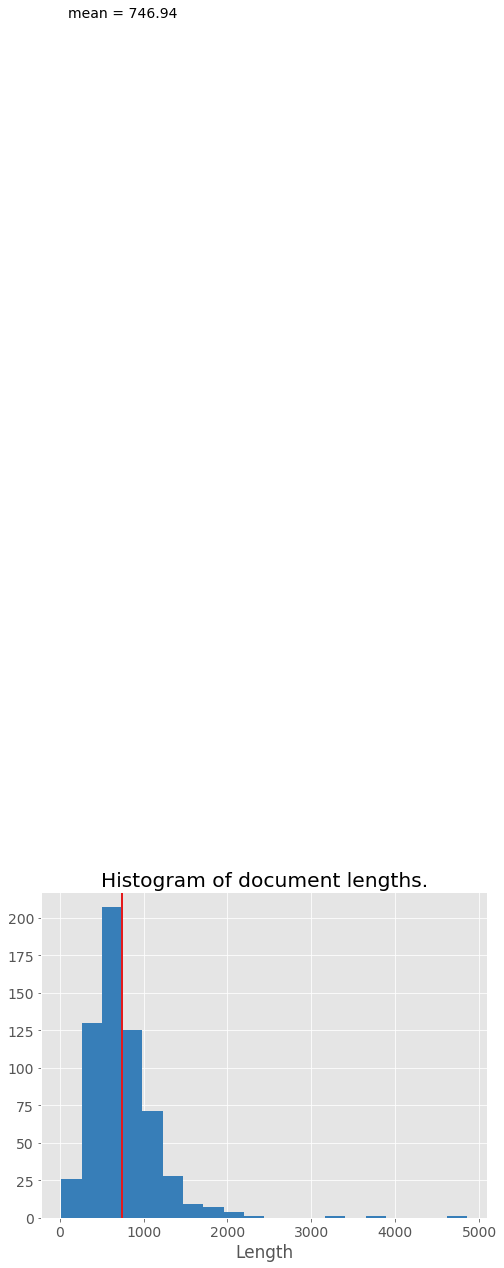

In [102]:
# Similarity queries on WMD distances
# Document lengths.
lens = [len(doc) for doc in train_text]

# Plot.
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=14)
plt.rc('lines', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))
# Histogram.
plt.hist(lens, bins=20)
plt.hold(True)
# Average length.
avg_len = sum(lens) / float(len(lens))
plt.axvline(avg_len, color='#e41a1c')
plt.hold(False)
plt.title('Histogram of document lengths.')
plt.xlabel('Length')
plt.text(100, 800, 'mean = %.2f' % avg_len)
# plt.show()

# Initialize WmdSimilarity.
from gensim.similarities import WmdSimilarity
num_best = 10
instance = WmdSimilarity(texts, model_wiki_de, num_best=10)
start = time()

sims = instance[texts[1]]  # A query is simply a "look-up" in the similarity class.
print 'Cell took %.2f seconds to run.' %(time() - start)

In [103]:
# Print the query and the retrieved documents, together with their similarities.
print 'Query:'
print train.iloc()[1]['ADDITIONALTEXT']
# print " ".join(texts[3])
print type(sims)
for i in range(num_best):
    print
    print 'sim = %.4f' % sims[i][1]
    print sims[i][0]
    print train.iloc()[sims[i][0]]['THEME']
    print train.iloc()[sims[i][0]]['ADDITIONALTEXT']
#     print (" ").join(texts[sims[i][0]])

Query:
Hündchen Bello möchte krähen können wie Hahn Kikerex. Ob dem Hündchen das gelingt? Entlein Schnatterinchen findet in ihrem eigenen Schatten einen prima Freund. Doch kann dieser in der Not auch helfen? Die Schildkröte Immerlangsam landet bei einem Sturm auf dem Rücken. Nun spricht sie nur noch rückwärts. Und Elefant Louis und Tiger Streifchen reimen und singen gemeinsam ein Lied auf die Freundschaft. Dreißig Tiererzählungen voller Klugheit und Humor laden große und kleine Kinder zum Staunen, Lachen und Nachdenken ein - ein Hörspaß für Kindergarten, zu Hause und unterwegs.<br>Aus dem Inhalt: Bunte Tierkinder - Der glücklichste Tag - Das seltsame Rezept - Der dickköpfige Esel - Die schwimmende Wasserfontäne - Mondsplitter auf dem Dach - Die Wolke im Trog - Der Igel, der gestreichelt werden wollte - Die Beule - Der faule Seehund - Das springende Häuschen u. v. a.<br>Das gleichnamige Buch ist im leiv Leipziger Kinderbuchverlag erschienen.
<type 'list'>

sim = 1.0000
1
Kinder/Jugendli

In [108]:
# print train.iloc()[11]['ADDITIONALTEXT']
# print train.iloc()[2]['ADDITIONALTEXT']
# print train.iloc()[272]['ADDITIONALTEXT']
# print (" ").join(texts[11])
distance = model_wiki_de.wmdistance(texts[1], texts[158])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/(1. + distance)), 1 , 158)

distance = model.wmdistance(texts[11], texts[272])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/distance), 11 , 272)

distance = model.wmdistance(texts[2], texts[272])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/distance), 2 , 272)

# for i in range(100):
#     distance = model.wmdistance(texts[11], texts[i])
#     print 'distance = %.4f between documents %d, %d' % (distance, 11 , i)

# Findings - the distance calculated can be greater than 1 for model01, thus the sim values are b/w (0,1) while for model02, distances are less than 1 and sim can be > 1

2018-05-18 16:02:50,390 : INFO : Removed 50 and 24 OOV words from document 1 and 2 (respectively).
2018-05-18 16:02:50,392 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 16:02:50,393 : INFO : built Dictionary(50 unique tokens: [u'kr\xe4hen', u'eins', u'eigenen', u'erschienen', u'erfolgreiche']...) from 2 documents (total 52 corpus positions)
2018-05-18 16:02:50,409 : INFO : Removed 10 and 7 OOV words from document 1 and 2 (respectively).
2018-05-18 16:02:50,410 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 16:02:50,411 : INFO : built Dictionary(59 unique tokens: [u'Zugabe', u'tiefer', u'anwenden', u'Basis', u'typische']...) from 2 documents (total 69 corpus positions)
2018-05-18 16:02:50,427 : INFO : Removed 8 and 7 OOV words from document 1 and 2 (respectively).
2018-05-18 16:02:50,429 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 16:02:50,430 : INFO : built Dictionary(60 unique tokens: [u'geboren', u's

distance = 1.0339 sim = 0.4917 between documents 1, 158
distance = 1.0133 sim = 0.9869 between documents 11, 272
distance = 1.1362 sim = 0.8801 between documents 2, 272


In [101]:
print train.iloc()[1]['ADDITIONALTEXT']
len(texts)

Hündchen Bello möchte krähen können wie Hahn Kikerex. Ob dem Hündchen das gelingt? Entlein Schnatterinchen findet in ihrem eigenen Schatten einen prima Freund. Doch kann dieser in der Not auch helfen? Die Schildkröte Immerlangsam landet bei einem Sturm auf dem Rücken. Nun spricht sie nur noch rückwärts. Und Elefant Louis und Tiger Streifchen reimen und singen gemeinsam ein Lied auf die Freundschaft. Dreißig Tiererzählungen voller Klugheit und Humor laden große und kleine Kinder zum Staunen, Lachen und Nachdenken ein - ein Hörspaß für Kindergarten, zu Hause und unterwegs.<br>Aus dem Inhalt: Bunte Tierkinder - Der glücklichste Tag - Das seltsame Rezept - Der dickköpfige Esel - Die schwimmende Wasserfontäne - Mondsplitter auf dem Dach - Die Wolke im Trog - Der Igel, der gestreichelt werden wollte - Die Beule - Der faule Seehund - Das springende Häuschen u. v. a.<br>Das gleichnamige Buch ist im leiv Leipziger Kinderbuchverlag erschienen.


611